## 🕵️‍♂️ E-Commerce Fraud Risk Analysis — Project Overview

This case study simulates the analytical workflow of a fraud and claim-investigation specialist within a large e-commerce operation.  
The objective is to detect fraudulent refund patterns, evaluate operational risk, and derive insights that improve investigation efficiency and policy accuracy.

### Context & Business Understanding
Fraud investigation teams handle thousands of refund and reimbursement claims across multiple programs.  
While most claims are genuine, a small portion involve refund manipulation, counterfeit items, or repeated abuse of return policies.  
Analysts leverage historical claims data, behavioral indicators, and financial metrics to:

- Validate claim legitimacy and refund accuracy  
- Identify recurring fraud trends and repeat offenders  
- Quantify operational inefficiencies affecting resolution time and SLA compliance  
- Generate data-driven insights that inform fraud-prevention SOPs and escalation triggers  

### Analytical Objective
The project builds a data-driven framework that combines exploratory and statistical analysis to:
- Detect high-risk claim categories and customer cohorts  
- Measure variation in fraud probability across attributes (region, category, transaction value)  
- Validate behavioral differences between fraudulent and legitimate claims using statistical tests  
- Translate analytical findings into actionable process or policy improvements  

### Dataset
A **synthetic dataset** of 200k claims models real-world reimbursement scenarios.  
It includes program type, claim category, refund and transaction amounts, customer behavior metrics, and a generated `fraud_probability_score` field.  
All data and identifiers are artificial and generalized for demonstration purposes.

### Tools & Techniques
- **Python:** pandas, matplotlib, seaborn, scipy, statsmodels  
- **Methods:** Exploratory Data Analysis (EDA), Correlation & Outlier Detection, Hypothesis Testing, Fraud Probability Scoring  

### Business Impact
Demonstrates how data-driven analysis can:
- Detect abnormal claim behavior early  
- Support consistent investigation outcomes  
- Strengthen fraud-prevention SOPs and operational efficiency  

> **Note:** All data and program references are synthetic and not affiliated with or representative of any specific organization.



## **1. Data Collection**

The dataset was imported and validated for schema consistency using pandas.

Preliminary inspection was done using head() and info() to confirm expected column types and non-null distributions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the synthetic dataset
df=pd.read_csv(r"data/amazon_investigation_claims_raw.csv")

# Display the first few rows of the dataset
df.head()



,transaction_id,customer_id,seller_id,event_time,event_time_str,account_age_days,previous_claims_count,claim_amount,refund_amount,hour_of_day,...,partial_refund_flag,customer_claim_frequency_90d,seller_claim_frequency_90d,ip_address,device_id_hash,browser_language,geo_risk_score,anomaly_indicator,days_since_last_claim,is_prime_customer
0,T900093762,C1043513,S2009879,2024-06-01 20:44:16,2024-06-01 20:44:16,522,1,37.22,0.00,20,...,0,2,3,3.92.143.90,dev_zpezntjgbo,fr-FR,0.113,0,6.0,TRUE
1,T900051974,C1054008,S2004325,2024-05-15 11:04:50,2024-05-15 11:04:50,271,2,39.86,12.86,11,...,1,2,1,20.85.165.189,dev_qyee9lxicz,en-US,0.035,0,7.2,TRUE
2,T900143059,C1033985,S2005726,2023-12-01 15:03:37,2023-12-01 15:03:37,755,1,370.88,213.03,15,...,1,1,1,20.254.195.250,dev_fomt68xyzi,ar-AE,0.441,1,7.0,TRUE
3,T900126823,C1022673,S2011989,2024-05-25 12:46:31,2024-05-25 12:46:31,227,1,90.42,56.44,12,...,1,1,1,151.143.67.84,dev_gdak95hovj,en-IN,0.278,0,19.0,No
4,T900158618,C1043189,S2010626,2024-01-21 00:25:13,21/01/2024 00:25,245,1,82.56,70.75,0,...,1,1,2,241.12.17.49,dev_nj2cp5dzcv,en-US,0.449,1,13.9,FALSE


> Note: The sample dataset included here is a reduced, synthetic subset for demonstration purposes.
> The full dataset used in analysis contains ~200K rows and 37 columns, simulating Amazon case-level data.


In [4]:
# Check for missing values and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202000 entries, 0 to 201999
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   transaction_id                202000 non-null  object 
 1   customer_id                   202000 non-null  object 
 2   seller_id                     202000 non-null  object 
 3   event_time                    202000 non-null  object 
 4   event_time_str                199927 non-null  object 
 5   account_age_days              202000 non-null  int64  
 6   previous_claims_count         202000 non-null  int64  
 7   claim_amount                  202000 non-null  float64
 8   refund_amount                 198033 non-null  float64
 9   hour_of_day                   202000 non-null  int64  
 10  day_of_week                   202000 non-null  int64  
 11  is_weekend                    202000 non-null  int64  
 12  claim_type                    202000 non-nul

### **Column-by-Column Explanation**



 **1. transaction_id**
- **Description**: Unique identifier for each transaction/claim.
- **Sample Values**: `T1234567890`, `T1234567891`, `T1234567892`
- **Potential Issues to Clean**: None (unique field).

 **2. claim_type**
- **Description**: The type of claim being made (SAFE-T, OTC, OP).
- **Sample Values**: `SAFE-T`, `OTC`, `OP`
- **Potential Issues to Clean**: Typos, inconsistent casing.

 **3. claim_reason**
- **Description**: The reason for the claim (e.g., item not received, counterfeit).
- **Sample Values**: `item_not_received`, `counterfeit`, `damaged`
- **Potential Issues to Clean**: Spelling mistakes, missing categories.

 **4. fraud_flag**
- **Description**: Indicates whether the claim is suspected to be fraud (1 = suspected fraud, 0 = not suspected).
- **Sample Values**: `1`, `0`
- **Potential Issues to Clean**: Ensure the flag is correctly set (e.g., no missing values).

 **5. investigation_outcome**
- **Description**: Outcome of the investigation (approved, denied, escalated).
- **Sample Values**: `approved`, `denied`, `escalated`
- **Potential Issues to Clean**: None (valid categorical field).

 **6. investigator_id**
- **Description**: Unique ID for the investigator working on the claim.
- **Sample Values**: `INV123`, `INV456`
- **Potential Issues to Clean**: Ensure no missing values.

 **7. resolution_time_hours**
- **Description**: Time in hours taken to resolve the claim.
- **Sample Values**: `10`, `12`, `34`
- **Potential Issues to Clean**: Outliers, missing values.

 **8. claim_amount**
- **Description**: The total amount claimed by the customer.
- **Sample Values**: `50.75`, `100.30`
- **Potential Issues to Clean**: Outliers (e.g., extremely high claim amounts).

 **9. refund_amount**
- **Description**: The amount refunded to the customer.
- **Sample Values**: `30.50`, `75.00`
- **Potential Issues to Clean**: Missing values, numeric coercion.

 **10. payment_method**
- **Description**: Payment method used for the transaction.
- **Sample Values**: `card`, `net_banking`, `upi`
- **Potential Issues to Clean**: Typos, missing values.

 **11. account_age_days**
- **Description**: The age of the customer's account in days.
- **Sample Values**: `1000`, `365`
- **Potential Issues to Clean**: Missing values, incorrect calculations.

 **12. previous_claims_count**
- **Description**: Number of claims made previously by the customer.
- **Sample Values**: `2`, `3`
- **Potential Issues to Clean**: None (typically low values, but could be outliers).

 **13. device_type**
- **Description**: Type of device used for the transaction.
- **Sample Values**: `mobile`, `desktop`, `tablet`
- **Potential Issues to Clean**: Mixed casing.

 **14. browser**
- **Description**: Browser used for the transaction.
- **Sample Values**: `Chrome`, `Safari`, `Firefox`
- **Potential Issues to Clean**: Mixed casing, inconsistent values.

 **15. region**
- **Description**: The geographic region of the customer.
- **Sample Values**: `US`, `IN`, `UK`, `DE`
- **Potential Issues to Clean**: Missing regions, inconsistent format.

 **16. state_code**
- **Description**: State or region code for the customer (specific to some countries like the US and India).
- **Sample Values**: `CA`, `DL`, `NY`
- **Potential Issues to Clean**: Missing values for regions where state is irrelevant.

 **17. chargebacks_count**
- **Description**: Number of chargebacks initiated by the customer.
- **Sample Values**: `0`, `1`, `3`
- **Potential Issues to Clean**: Outliers, missing values.

 **18. disputes_count**
- **Description**: Number of disputes raised by the customer.
- **Sample Values**: `0`, `2`, `5`
- **Potential Issues to Clean**: Outliers, missing values.

 **19. repeat_fraud_attempts**
- **Description**: Whether the customer has made repeat fraud attempts (binary flag).
- **Sample Values**: `0`, `1`
- **Potential Issues to Clean**: None (binary flag).

 **20. fraud_probability_score**
- **Description**: Calculated score indicating the likelihood of the claim being fraud.
- **Sample Values**: `0.65`, `0.25`
- **Potential Issues to Clean**: Ensure it’s calculated correctly (no missing values).

 **21. days_since_last_claim**
- **Description**: The number of days since the customer’s last claim.
- **Sample Values**: `7`, `22`, `65`
- **Potential Issues to Clean**: Missing values, extreme outliers.

 **22. geo_risk_score**
- **Description**: A risk score based on the geographic region of the customer.
- **Sample Values**: `0.1`, `0.3`, `0.8`
- **Potential Issues to Clean**: Missing values, inconsistencies in calculation.

 **23. anomaly_indicator**
- **Description**: Flag indicating if the claim is anomalous (1 = anomaly, 0 = normal).
- **Sample Values**: `0`, `1`
- **Potential Issues to Clean**: Ensure proper setting and validation.

 **24. ip_address**
- **Description**: IP address used for the transaction.
- **Sample Values**: `192.168.1.1`, `172.16.0.5`
- **Potential Issues to Clean**: Anonymization, missing data.

 **25. device_id_hash**
- **Description**: Unique hash identifier for the device used for the transaction.
- **Sample Values**: `dev_abcd1234`, `dev_efgh5678`
- **Potential Issues to Clean**: None (unique field).

 **26. browser_language**
- **Description**: Browser language used during the transaction.
- **Sample Values**: `en-US`, `en-IN`, `fr-FR`
- **Potential Issues to Clean**: Missing values, inconsistent values.

 **27. is_prime_customer**
- **Description**: Whether the customer is a Prime member (binary flag).
- **Sample Values**: `TRUE`, `FALSE`
- **Potential Issues to Clean**: Inconsistent encodings (e.g., `TRUE` vs `Yes`).

 **28. resolution_time_hours**
- **Description**: Time in hours taken to resolve the claim.
- **Sample Values**: `10`, `12`, `24`
- **Potential Issues to Clean**: Outliers, missing values.

 **29. chargeback_flag**
- **Description**: Indicates if the claim involves a chargeback.
- **Sample Values**: `1`, `0`
- **Potential Issues to Clean**: Missing values, inaccurate flags.

**30. dispute_flag**
- **Description**: Indicates if the claim involves a dispute.
- **Sample Values**: `1`, `0`
- **Potential Issues to Clean**: Missing values, inaccurate flags.


## 2. **Data Integrity & Preprocessing**

**Objective**: Clean and preprocess the data to ensure it’s ready for analysis. This step involves handling missing values, duplicates , checking Outliers impact and other data Preprocessing techniques


### Duplicate Records Imputation

In [5]:
# Checking duplicate records
df[df.duplicated(subset='transaction_id',keep=False)]

,transaction_id,customer_id,seller_id,event_time,event_time_str,account_age_days,previous_claims_count,claim_amount,refund_amount,hour_of_day,...,partial_refund_flag,customer_claim_frequency_90d,seller_claim_frequency_90d,ip_address,device_id_hash,browser_language,geo_risk_score,anomaly_indicator,days_since_last_claim,is_prime_customer
4,T900158618,C1043189,S2010626,2024-01-21 00:25:13,21/01/2024 00:25,245,1,82.56,70.75,0,...,1,1,2,241.12.17.49,dev_nj2cp5dzcv,en-US,0.449,1,13.9,FALSE
38,T900084198,C1033995,S2000254,2024-01-10 22:23:22,"Jan 10, 2024 10:23 PM",371,0,179.21,82.50,22,...,1,0,1,197.164.116.185,dev_msas25p2ju,en-US,0.272,0,100.8,FALSE
109,T900024581,C1042488,S2007727,2024-01-31 02:07:54,31/01/2024 02:07,566,1,191.30,125.68,2,...,1,1,0,159.181.80.52,dev_yzxv210t6k,en-IN,0.292,0,4.1,TRUE
126,T900158212,C1004073,S2002643,2023-11-19 02:18:13,19/11/2023 02:18,227,1,66.46,49.20,2,...,1,1,1,159.67.33.11,dev_apagpa1x31,en-IN,0.161,0,29.1,FALSE
133,T900100383,C1000595,S2004061,2024-05-24 04:43:43,24/05/2024 04:43,513,1,204.24,112.96,4,...,1,2,1,144.218.199.46,dev_nmg58yy1tw,ar-AE,0.200,0,17.9,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201784,T900052733,C1012509,S2010127,2024-04-17 20:17:08,17/04/2024 20:17,246,0,83.24,61.31,20,...,1,1,2,171.89.244.22,dev_yxriz0p72z,ar-AE,0.441,0,21.6,FALSE
201825,T900052271,C1037752,S2000936,2023-01-04 03:24:29,2023-01-04 03:24:29,376,0,100.17,0.00,3,...,0,0,1,139.28.200.247,dev_uvcl0m52mg,en-US,0.339,0,12.4,FALSE
201865,T900116852,C1053944,S2005824,2024-03-06 04:03:36,2024-03-06 04:03:36,611,1,29.40,9.99,4,...,0,2,2,191.30.225.236,dev_5at0lcg6qk,ar-AE,0.347,0,6.5,TRUE
201931,T900068362,C1046701,S2003240,2023-06-17 12:51:40,17/06/2023 12:51,435,1,97.82,71.84,12,...,1,1,0,162.190.144.121,dev_uqv23w45v3,en-IN,0.000,0,2.4,TRUE


In [6]:
#Removing duplicate records based on transaction_id
df=df.drop_duplicates(subset='transaction_id',keep='first')

In [7]:
# Checking the values
df['transaction_id'].duplicated().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 201999
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   transaction_id                200000 non-null  object 
 1   customer_id                   200000 non-null  object 
 2   seller_id                     200000 non-null  object 
 3   event_time                    200000 non-null  object 
 4   event_time_str                197952 non-null  object 
 5   account_age_days              200000 non-null  int64  
 6   previous_claims_count         200000 non-null  int64  
 7   claim_amount                  200000 non-null  float64
 8   refund_amount                 196063 non-null  float64
 9   hour_of_day                   200000 non-null  int64  
 10  day_of_week                   200000 non-null  int64  
 11  is_weekend                    200000 non-null  int64  
 12  claim_type                    200000 non-null  ob

### Missing Value Imputation / Data Validation

*`Claim Type`*

In [10]:
# Checking the values to be cleaned
df['claim_type'].unique()

array(['OP', 'SAFE-T', 'OTC', 'SAFET', 'P', 'eP', 'SAnE-T', 'SAFE-', 'Ok',
       'SAgE-T', 'Ob', 'OuC', 'OTr', 'Oy', 'SFE-T', 'StFE-T', 'O', 'OT',
       'sP', 'OTc', 'SAF-T', 'SAE-T', 'SAoE-T', 'SAFE-x', 'SAFr-T', 'OgC',
       'SAFw-T', 'AFE-T', 'OqC', 'wP', 'SAvE-T', 'SsFE-T', 'TC', 'vP',
       'OTj', 'cAFE-T', 'yP', 'OpC', 'OC', 'lP', 'SpFE-T', 'SAFE-y', 'Os',
       'Oa', 'SfFE-T', 'tAFE-T', 'SAcE-T', 'Oq', 'xP', 'SAFE-n', 'oP',
       'iTC', 'SAyE-T', 'OTk', 'SzFE-T', 'zTC', 'uP', 'SAFElT', 'SrFE-T',
       'On', 'Oi', 'SAFEiT', 'SAFE-i', 'xTC', 'SAjE-T', 'SAFz-T',
       'jAFE-T', 'SdFE-T', 'SkFE-T', 'SAFg-T', 'OlC', 'aAFE-T', 'wTC',
       'eTC', 'pP', 'SAFE-s', 'Ov', 'SAFE-a', 'sAFE-T', 'SAFd-T', 'dTC',
       'SAFE-e', 'OTh', 'SAFl-T', 'oAFE-T', 'Og', 'nP', 'SAFE-u',
       'SAsE-T', 'SAFE-c', 'tP', 'OhC', 'SAdE-T', 'SmFE-T', 'SAFj-T',
       'qTC', 'OTo', 'Oc', 'OTs', 'SwFE-T', 'Ol', 'OwC', 'SAFt-T', 'OTe',
       'OTt', 'OTg', 'Od', 'SAFk-T', 'rP', 'SAqE-T', 'SaFE-T', 'SA

In [11]:
# Function to clean the order based on the length

def categorize_by_length(val):
  val=str(val).upper().replace("-","").replace(" ","")
  length=len(val)

  if length > 3:
        return "SAFE-T"
  elif length == 3:
        return "OTC"
  else:
        return "OP"

In [12]:
#Applying Function

df['claim_type']=df['claim_type'].apply(categorize_by_length)

In [13]:
# Checking to see if changes are applied

df['claim_type'].unique()

array(['OP', 'SAFE-T', 'OTC'], dtype=object)

*`Payment Method`*

In [14]:
# Checking the values to be cleaned

df['payment_method'].unique()

array(['net_banking', 'upi', 'card', 'cod', 'gift_card', 'wallet', nan,
       'uti', 'nut_banking', 'car', 'cart', 'net_kanking', 'npi', 'crd',
       'gift_fard', 'ift_card', 'wllet', 'walle', 'gft_card', 'tod',
       'ard', 'gift_cad', 'ui', 'gift_ard', 'cavd', 'cad', 'wpllet',
       'wallek', 'carn', 'up', 'gift_cary', 'co', 'net_ianking', 'cawd',
       'caxd', 'uei', 'pi', 'cop', 'gift_tard', 'net_bankeng',
       'net_bankin', 'dod', 'cfrd', 'wallst', 'uji', 'wailet',
       'net_bankxng', 'cajd', 'giftzcard', 'carj', 'ckrd', 'ufi', 'uoi',
       'ccrd', 'net_fanking', 'opi', 'walet', 'allet', 'netrbanking',
       'upq', 'cd', 'cars', 'zpi', 'net_bankieg', 'vpi', 'an', 'nn',
       'wallen', 'nt_banking', 'ubi', 'ipi', 'net_zanking', 'od',
       'gift_capd', 'ward', 'cyrd', 'carr', 'net_bankinj', 'com', 'cor',
       'gift_car', 'net_bankkng', 'net_bankinp', 'net_bankng',
       'lift_card', 'net_bdnking', 'watlet', 'waclet', 'hpi', 'hift_card',
       'gift_xard', 'upy', 'n

In [15]:
# Importing fuzzywuzzy library

!pip install fuzzywuzzy python-Levenshtein



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.4 MB/s eta 0:00:00


In [16]:
from fuzzywuzzy import process

In [17]:
# Defining the valid categories
valid_methods = ['net_banking', 'upi', 'card', 'cod', 'gift_card', 'wallet']

# Defining the fuzzy-matching function
def fuzzy_map(val):
    if pd.isna(val):
        return 'unknown'

    val = str(val).lower().strip().replace("-", "_")
    match, score = process.extractOne(val, valid_methods)

    return match if score >= 80 else 'unknown'

# Apply the function to the payment_method column
df['payment_method']=df['payment_method'].apply(fuzzy_map)


In [18]:
# Checking to see if changes are applied correctly

df['payment_method'].unique()

array(['net_banking', 'upi', 'card', 'cod', 'gift_card', 'wallet',
       'unknown'], dtype=object)

*`claim_reason`*

In [19]:
# Checking the total number of unique values

df['claim_reason'].nunique()

1440

In [20]:
df['claim_reason'].value_counts().head(15)

,count
claim_reason,
counterfeit,21464
not_as_described,21446
return_abuse,21405
damaged,21394
wrong_item,21379
empty_box,21346
late_delivery,21298
item_not_received,21246
payment_issue,21211


In [21]:
# Defining the valid categories
valid_methods = ['counterfeit', 'not_as_described', 'return_abuse', 'damaged', 'wrong_item', 'empty_box',
                 'late_delivery','item_not_received','payment_issue']

# Defining the fuzzy-matching function
def fuzzy_map_cr(val):
    if pd.isna(val):
        return 'unknown'

    val = str(val).lower().strip()
    match, score = process.extractOne(val, valid_methods)

    return match if score >= 80 else 'unknown'

# Applying the function to the claim_reason column
df['claim_reason']=df['claim_reason'].apply(fuzzy_map_cr)

In [22]:
# Checking to see if changes are applied correctly

df['claim_reason'].value_counts()

,count
claim_reason,
counterfeit,21873
return_abuse,21851
not_as_described,21834
damaged,21810
empty_box,21781
wrong_item,21772
late_delivery,21721
item_not_received,21681
payment_issue,21644


In [23]:
df.select_dtypes(include='object').columns

Index(['transaction_id', 'customer_id', 'seller_id', 'event_time',
       'event_time_str', 'claim_type', 'claim_reason', 'payment_method',
       'device_type', 'browser', 'region', 'state_code', 'investigator_id',
       'investigation_outcome', 'ip_address', 'device_id_hash',
       'browser_language', 'is_prime_customer'],
      dtype='object')

*`device_type`*

In [24]:
# Checking the total number of unique values

df['device_type'].unique()

array(['Desktop', 'Mobile', 'MOBILE', 'Tablet', 'DESKTOP', 'TABLET'],
      dtype=object)

In [25]:
# Since they are mostly case sensitive problem , correcting them

df['device_type']=df['device_type'].str.replace('DESKTOP','Desktop')
df['device_type']=df['device_type'].str.replace('MOBILE','Mobile')
df['device_type']=df['device_type'].str.replace('TABLET','Tablet')

In [26]:
# Checking to see if changes are applied correctly

df['device_type'].unique()

array(['Desktop', 'Mobile', 'Tablet'], dtype=object)

***`Refund_amount`***

In [27]:
## Imputing refund amount and Inconsistency in Refund ussued and Partial refund flad

*** Refund Data Cleaning and Imputation Strategy***

 Before imputing missing values in the `refund_amount` column, I first investigated the reason for the missing values.
Specifically, I checked whether they were missing due to:
 - No refund transaction taking place
 - Any relationship with other fields such as `refund_issued` or `partial_refund_flag`

 During this exploration, I discovered inconsistencies:
 - Some rows had `refund_issued = 1` even though `refund_amount` was null.
 - Similarly, some rows had `partial_refund_flag = 1` when no refund amount was recorded.

 These mismatches indicated data quality issues in the flag columns.

> To address this:
 - I imputed missing values in `refund_amount` with 0, under the assumption that no refund was issued in those cases.
 - I created **corrected versions** of the flag columns:
     - `correct_refund_issued`: Set to 1 if `refund_amount > 0`, else 0.
     - `correct_partial_refund_flag`: Set to 1 if `refund_amount > 0` and less than `claim_amount`, else 0.
 - I preserved the original flags (`refund_issued`, `partial_refund_flag`) for auditability and comparison.

 I also calculated how many rows were inconsistent to support this decision.

 In my analysis I used the corrected versions of the flags to ensure consistency and data quality,

 while keeping the original values for reference.


In [28]:
# when refund amount is null , refund_issued and partial_refund_flag are still 1 , citing inconsistency

df[(df['refund_amount'].isnull()) & (df['refund_issued']==1)][['refund_amount','partial_refund_flag','refund_issued']]

,refund_amount,partial_refund_flag,refund_issued
228,NaN,1,1
242,NaN,1,1
602,NaN,1,1
638,NaN,1,1
653,NaN,1,1
...,...,...,...
201614,NaN,1,1
201626,NaN,1,1
201699,NaN,1,1
201808,NaN,1,1


In [29]:
# when refund amount is less then claim amt and not equal to 0 ,
# then all partial_refund_flag must have been  1 but there are 0's present

df[(df['refund_amount']<df['claim_amount']) & (df['refund_amount']!=0)]['partial_refund_flag'].value_counts()

,count
partial_refund_flag,
1,124552
0,22552


In [30]:
# Impute refund_amount with 0 if missing (means no refund issued)
df['refund_amount'] = df['refund_amount'].fillna(0)

# Create corrected flags
df['correct_refund_issued_flag'] = (df['refund_amount'] > 0).astype(int)

df['correct_partial_refund_flag'] = (
    (df['refund_amount'] > 0) &
    (df['refund_amount'] < df['claim_amount'])
).astype(int)


In [31]:
# Checking to see if changes are applied correctly

df['refund_amount'].isnull().sum()

np.int64(0)

***`Browser`***

In [32]:
# Imputing the values of browser type

df['browser'].value_counts(dropna=False)

,count
browser,
Chrome,121769
Safari,35284
Firefox,23302
Edge,11801
Opera,3960
NaN,3884


 I found 3,884 missing values in the browser column.

Since the browser is a categorical featureand may be relevant for user behavior or fraud detection, I imputed the missing values with 'Unknown'.

This preserves the integrity of the original browser distribution.

In [33]:
df['browser']=df['browser'].fillna('Unknown')

In [34]:
df['browser'].value_counts()

,count
browser,
Chrome,121769
Safari,35284
Firefox,23302
Edge,11801
Opera,3960
Unknown,3884


***`State Code`***

In [35]:
# Imputing the values for State Code

sc=df.groupby('region')['state_code'].value_counts(dropna=False).reset_index()

In [36]:
sc

,region,state_code,count
0,AE,NaN,2372
1,AE,NY,93
2,AE,TN,91
3,AE,WA,89
4,AE,TS,88
...,...,...,...
185,US,IL,6608
186,US,NY,6592
187,US,WA,6592
188,US,CA,6475


In [37]:
# Checking the total number of unique values

df['region'].unique()

array(['US', 'IN', 'AE', 'UK', 'FR', 'CA', 'DE', 'JP', 'AU', 'SG'],
      dtype=object)

In [38]:
# Checking the state Codes of US
sc[sc['region']=='US']

,region,state_code,count
179,US,FL,6780
180,US,NC,6741
181,US,PA,6727
182,US,TX,6664
183,US,OH,6645
184,US,GA,6628
185,US,IL,6608
186,US,NY,6592
187,US,WA,6592
188,US,CA,6475


In [39]:
df.loc[(df['region'] == 'US') & (df['state_code'].isna()), 'state_code'] = 'Unknown_US'

# For the US region, all observed state_codes matched valid U.S. state abbreviations
#  (e.g., FL, NY, CA, etc.), and the distribution was reasonable.

#  Therefore, I imputed missing values using 'Unknown_US'
#  to maintain consistency without introducing geographical noise.

In [40]:
sc[sc['region']=='IN']

,region,state_code,count
105,IN,DL,6421
106,IN,GJ,6362
107,IN,KA,6340
108,IN,UP,6311
109,IN,TN,6282
110,IN,WB,6265
111,IN,RJ,6245
112,IN,TS,6212
113,IN,KL,6198
114,IN,MH,6148


In [41]:
df.loc[(df['region'] == 'IN') & (df['state_code'].isna()), 'state_code'] = 'Unknown_IN'

In [42]:
df[df['region']=='IN']['state_code'].value_counts()

,count
state_code,
DL,6421
GJ,6362
KA,6340
UP,6311
TN,6282
WB,6265
RJ,6245
TS,6212
KL,6198


In [43]:
sc[sc['region']=='AE']

,region,state_code,count
0,AE,NaN,2372
1,AE,NY,93
2,AE,TN,91
3,AE,WA,89
4,AE,TS,88
5,AE,FL,86
6,AE,NC,84
7,AE,MH,83
8,AE,DL,82
9,AE,GJ,81


In [44]:
sc[sc['region']=='JP']

,region,state_code,count
116,JP,NaN,4912
117,JP,RJ,177
118,JP,GJ,171
119,JP,WA,170
120,JP,CA,166
121,JP,UP,166
122,JP,KA,165
123,JP,WB,163
124,JP,PA,160
125,JP,FL,159


I assessed the `state_code` values relative to their `region`. For reliable regions like `US` and `IN`, where state codes were consistent, I imputed missing values as `'Unknown_US'` and `'Unknown_IN'` to maintain grouping consistency.

For other regions (`AE`, `UK`, `FR`, `CA`, `DE`, `JP`, `AU`, `SG`), the `state_code`s were often invalid or mismatched (e.g., U.S. or Indian states under non-U.S. regions). Since corrections would be speculative, I left those values, including `NaN`s, unchanged.

Since the rest of the data is non conformitive , apart from Region codes of IN and US, imputing the rest is not nessacery as data is not useable, keeping them as is


***`Reslution Time`***

In [45]:
# Imputing resolution_time_hours

df['resolution_time_hours'].describe()

,resolution_time_hours
count,195946.000000
mean,21.167623
std,30.365852
min,0.930000
25%,10.400000
50%,15.940000
75%,24.500000
max,655.274510


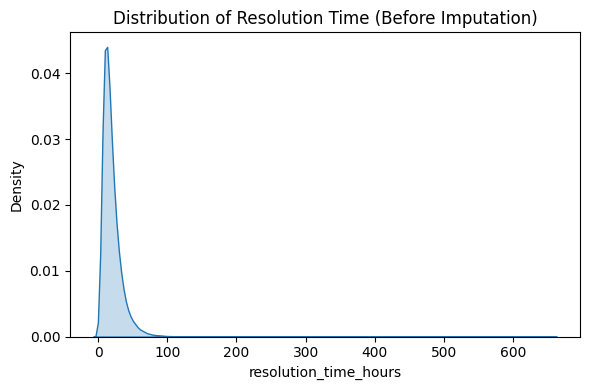

In [46]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['resolution_time_hours'],fill=True)
plt.title('Distribution of Resolution Time (Before Imputation)')
plt.tight_layout()
plt.show()

In [47]:
# Grouping by claim type to check the rate of missing values in resoloution time

df.groupby('claim_type')['resolution_time_hours'].apply(lambda x: (x.isnull().mean())*100).reset_index(name='missing_rate')


,claim_type,missing_rate
0,OP,2.071699
1,OTC,2.078485
2,SAFE-T,1.979101


In [48]:
# Grouping by claim type and fraud flag to check the rate of missing values in resoloution time


df.groupby(['claim_type','fraud_flag'])['resolution_time_hours'].apply(lambda x: (x.isnull().mean()*100)).reset_index(name='missing_rate')

,claim_type,fraud_flag,missing_rate
0,OP,0,2.068021
1,OP,1,2.097902
2,OTC,0,2.067893
3,OTC,1,2.154047
4,SAFE-T,0,1.959090
5,SAFE-T,1,2.032520


In [49]:
# Checking the Median values

df['resolution_time_hours'].median()

15.94

In [50]:
# Checking the Median values grouped by Claim Type

df.groupby(['claim_type'])['resolution_time_hours'].median()

,resolution_time_hours
claim_type,
OP,15.98
OTC,15.89
SAFE-T,15.94


In [51]:
df.groupby(['claim_type','fraud_flag'])['resolution_time_hours'].median()

claim_type  fraud_flag
OP          0             15.89
            1             16.65
OTC         0             15.81
            1             16.40
SAFE-T      0             15.84
            1             16.25
Name: resolution_time_hours, dtype: float64

The resolution_time_hours column is heavily right-skewed, with a small percentage (~2%) of missing values. Imputing with the mean would introduce bias due to outliers and distort the original distribution.

Analysis showed that resolution times are consistent across claim_type and fraud_flag combinations, and missingness appears to be MCAR.

Therefore, imputing missing values using the median grouped by claim_type is appropriate, as it preserves group-level patterns without being influenced by skew or outliers.

In [52]:
df['resolution_time_hours']=df.groupby('claim_type')['resolution_time_hours'].transform(lambda x: (x.fillna(x.median())))


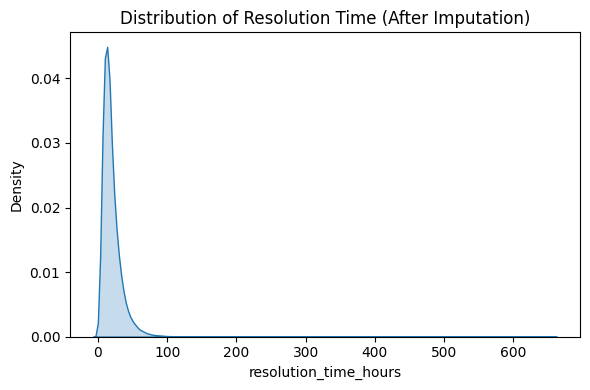

In [53]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['resolution_time_hours'],fill=True)
plt.title('Distribution of Resolution Time (After Imputation)')
plt.tight_layout()
plt.show()

***`investigation_id`***

In [54]:
# Imputing the values of investigation_id, checking the total null values

df['investigator_id'].value_counts(dropna=False,ascending=False)

,count
investigator_id,
NaN,3972
INV3302,554
INV3267,554
INV3314,553
INV3373,549
...,...
INV3287,439
INV3037,438
INV3247,436


In [55]:
# Filling Values with Null
df['investigator_id'] = df['investigator_id'].fillna('UNKNOWN')

The investigation_id column had ~2% (3972/20000)missing values. Since the rest of the claim and event data was complete and refunds were processed normally, this missingness was assumed to be Missing Completely at Random (MCAR).

These nulls were interpreted as cases that were not assigned an investigator, and filled with a placeholder 'UNKNOWN'.

In [56]:
## Treating Outliers

***`Prime Customer`***

In [57]:
# Cleaning the values ind Prime Customer column

df['is_prime_customer'].value_counts()

,count
is_prime_customer,
FALSE,104102
TRUE,85905
No,5532
Yes,4461


In [58]:
# converting True to Yes and No to False

df['is_prime_customer']=df['is_prime_customer'].str.replace('TRUE','Yes')

df['is_prime_customer']=df['is_prime_customer'].str.replace('FALSE','No')

In [59]:
df['is_prime_customer'].value_counts()

,count
is_prime_customer,
No,109634
Yes,90366


***`Event Time`***

In [60]:
# event time is in object converting to datetime

df['event_time']=pd.to_datetime(df['event_time'])

In [61]:
df['event_time'].dt.year.unique()

array([2024, 2023], dtype=int32)

In [62]:
df['event_time'].dt.month.unique()

array([ 6,  5, 12,  1, 10,  9,  7,  3,  4,  2,  8, 11], dtype=int32)

### Currency Normalization by Region
Since refund and claim amounts were denominated in local marketplace currencies (based on region),they were standardized to USD using live FX rates from *open.er-api.com*.  

This ensures consistency in monetary analysis across regions and preventing distortions during value-based comparisons.


In [63]:
df['refund_amount'].describe()

,refund_amount
count,200000.000000
mean,55.608582
std,158.645851
min,0.000000
25%,12.840000
50%,34.960000
75%,63.562500
max,14150.700000


In [64]:
# total number of unique currency denominations

df['region'].unique()

array(['US', 'IN', 'AE', 'UK', 'FR', 'CA', 'DE', 'JP', 'AU', 'SG'],
      dtype=object)

In [65]:
import requests

#Fetching  the  exchange rates (base = USD)
response = requests.get("https://open.er-api.com/v6/latest/USD")
rates = response.json()["rates"]

# Create conversion factor → how many USD per local unit ( Normalizing all the values to USD)
rate_to_usd = {currency: 1 / rate for currency, rate in rates.items()}

# Map each region to its local currency
region_currency_map = {
    "US": "USD",
    "IN": "INR",
    "UK": "GBP",
    "CA": "CAD",
    "AU": "AUD",
    "JP": "JPY",
    "DE": "EUR",
    "SG": "SGD",
    "FR": "EUR",
    "AE": "AED"
}

# Creating  currency and corresponding USD rate as new columns
df["currency"] = df["region"].map(region_currency_map)
df["rate_to_usd"] = df["currency"].map(rate_to_usd)

# Converting refund and claim amounts to USD
df["refund_amount_usd"] = df["refund_amount"] * df["rate_to_usd"]
df["claim_amount_usd"] = df["claim_amount"] * df["rate_to_usd"]

# Checking a sample
df[["region", "currency", "rate_to_usd", "refund_amount", "refund_amount_usd"]].sample(7)


,region,currency,rate_to_usd,refund_amount,refund_amount_usd
169965,IN,INR,0.011277,23.10,0.260498
171878,US,USD,1.000000,59.46,59.460000
186637,US,USD,1.000000,18.77,18.770000
199285,US,USD,1.000000,47.47,47.470000
8974,DE,EUR,1.153966,20.22,23.333183
99117,IN,INR,0.011277,0.00,0.000000
46115,IN,INR,0.011277,14.05,0.158441


In [66]:
# checking to see if there are any missing currency denominations

df[~df['currency'].isin(rates.keys())]['currency'].unique()

# empty array , means al;l are coverted

array([], dtype=object)

In [67]:
# recking the distribution now

df['refund_amount_usd'].describe()

,refund_amount_usd
count,200000.000000
mean,34.562777
std,126.283169
min,0.000000
25%,0.223284
50%,6.920000
75%,42.660527
max,14150.700000


In [68]:
df['refund_issued'].unique()

array([0, 1])

### Outliers Detetction

Outlier detection cane be applied only to continuous variables, as binary, ordinal, and count-based features do not have a statistical concept of "outliers".

Since most extreme values in this fraud-related dataset are likely to reflect actual behavior rather than data errors, no outlier removal or capping was applied.

Instead, visual inspection and transformations (e.g., log) were considered where appropriate.

### Fraud Probability Score

The dataset includes a pre-generated variable, fraud_probability_score, representing the likelihood of each claim being fraudulent.
This score is synthetically derived and used as a reference variable for validating analytical observations rather than as a model prediction target.

### Types Of Data in The Dataset

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 201999
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   transaction_id                200000 non-null  object        
 1   customer_id                   200000 non-null  object        
 2   seller_id                     200000 non-null  object        
 3   event_time                    200000 non-null  datetime64[ns]
 4   event_time_str                197952 non-null  object        
 5   account_age_days              200000 non-null  int64         
 6   previous_claims_count         200000 non-null  int64         
 7   claim_amount                  200000 non-null  float64       
 8   refund_amount                 200000 non-null  float64       
 9   hour_of_day                   200000 non-null  int64         
 10  day_of_week                   200000 non-null  int64         
 11  is_weekend        

In [70]:
# continous data :
# account_age_days , claim_amount , refund_amount , resolution_time_hours , fraud_probability_score
# geo_risk_score , days_since_last_claim


# binary data:
# is_weekend , fraud_flag ,refund_issued ,partial_refund_flag, anomaly_indicator, correct_refund_issued_flag,
# correct_partial_refund_flag,repeat_fraud_attempts


#ordinal,cyclical :
# hour_of_day , day_of_week

# discrete count:
# previous_claims_count , chargebacks_count, disputes_count,
# customer_claim_frequency_90d ,  seller_claim_frequency_90d

#categorical:
# 'transaction_id', 'customer_id', 'seller_id', 'event_time',
# 'event_time_str', 'claim_type', 'claim_reason', 'payment_method',
# 'device_type', 'browser', 'region', 'state_code', 'investigator_id',
# 'investigation_outcome', 'ip_address', 'device_id_hash',
# 'browser_language', 'is_prime_customer'




## 3. **Exploratory Data Analysis (EDA)**

The EDA phase provides an initial understanding of the dataset’s structure, variable distributions, and key operational trends.

This step sets the foundation for deeper statistical and fraud-pattern analyses by revealing early data relationships and potential anomalies.

**`Fraud Distribution`**

In [71]:
sns.set(style="whitegrid", palette="coolwarm", font_scale=1.0) # Setting global seaborn style

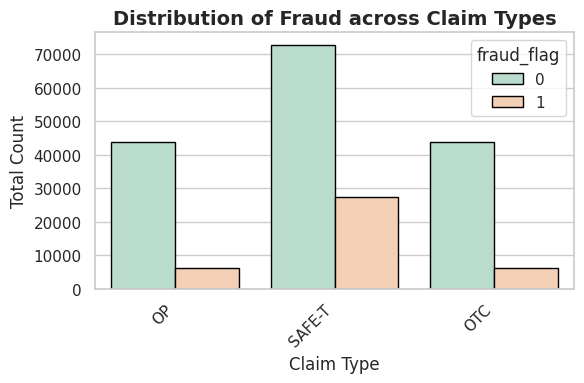

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(df,x=df['claim_type'],hue=df['fraud_flag'],edgecolor='black',palette='Pastel2')
plt.title("Distribution of Fraud across Claim Types",fontsize=14,weight='bold')
plt.xlabel("Claim Type",fontsize=12)
plt.ylabel("Total Count",fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SAFE-T claim type not only accounts for the highest number of claims, but also disproportionately contributes to fraudulent activity.

Even though OP and OTC have similar volumes, they show much smaller fraudulent components.

This suggests a strong association between claim type and fraud, particularly for SAFE-T claims.

**Distribution of fraud probability scores across claim types**

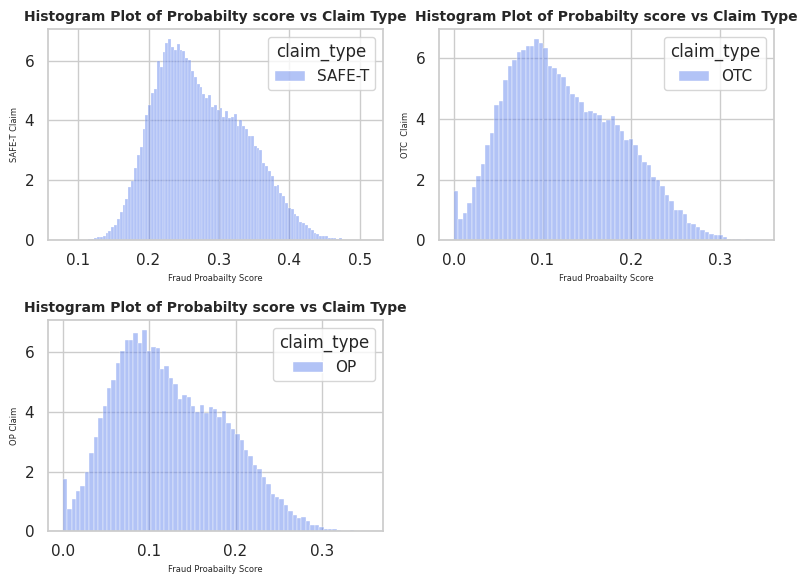

In [73]:
# Histograms to analyze fraud_probability_score distribution by claim_type.

temp1=df[df['claim_type']=="SAFE-T"]
temp2=df[df['claim_type']=="OTC"]
temp3=df[df['claim_type']=="OP"]

plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(temp1,x='fraud_probability_score',hue='claim_type',stat='density')
plt.title("Histogram Plot of Probabilty score vs Claim Type",fontsize=10,weight='bold')
plt.xlabel("Fraud Proabailty Score",fontsize=6)
plt.ylabel("SAFE-T Claim",fontsize=6)

plt.subplot(2,2,2)
sns.histplot(temp2,x='fraud_probability_score',hue='claim_type',stat='density')
plt.title("Histogram Plot of Probabilty score vs Claim Type",fontsize=10,weight='bold')
plt.xlabel("Fraud Proabailty Score",fontsize=6)
plt.ylabel("OTC  Claim",fontsize=6)

plt.subplot(2,2,3)
sns.histplot(temp3,x='fraud_probability_score',hue='claim_type',stat='density')
plt.title("Histogram Plot of Probabilty score vs Claim Type",fontsize=10,weight='bold')
plt.xlabel("Fraud Proabailty Score",fontsize=6)
plt.ylabel("OP Claim",fontsize=6)


plt.tight_layout()
plt.savefig('fraud_probability_distribution.png', dpi=250, bbox_inches='tight')
plt.show()




Fraud probability scores show slightly right-skewed distributions for all claim types, suggesting a modest bias toward higher fraud likelihoods in specific program categories such as SAFE-T.

***`Fraud Trends`***

In [74]:
def claim_trends(claim_type):
    # Filter and aggregate for 2023
    temp = df[(df['event_time'].dt.year == 2023) &
              (df['claim_type'] == claim_type) &
              (df['fraud_flag'] == 1)]
    temp = temp.groupby(temp['event_time'].dt.month)['fraud_flag'].count().reset_index(name='fraud_count')

    # Filter and aggregate for 2024
    temp1 = df[(df['event_time'].dt.year == 2024) &
               (df['claim_type'] == claim_type) &
               (df['fraud_flag'] == 1)]
    temp1 = temp1.groupby(temp1['event_time'].dt.month)['fraud_flag'].count().reset_index(name='fraud_count')

    # Plotting
    plt.figure(figsize=(12, 8))

    # Subplot for 2023
    plt.subplot(1, 2, 1)
    sns.lineplot(data=temp, x='event_time', y='fraud_count', marker='o')
    plt.title(f"Fraudulent {claim_type} Claims in 2023", fontsize=13, weight='bold')
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.xticks(temp['event_time'])

    # Subplot for 2024
    plt.subplot(1, 2, 2)
    sns.lineplot(data=temp1, x='event_time', y='fraud_count', marker='o')
    plt.title(f"Fraudulent {claim_type} Claims in 2024", fontsize=13, weight='bold')
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.xticks(temp1['event_time'])

    plt.suptitle(f"Fraudulent '{claim_type}' Claims: 2023 vs 2024", fontsize=15, weight='bold', y=1.05)
    plt.tight_layout()
    plt.savefig('fraud_trend_2023_2024.png', dpi=250, bbox_inches='tight')
    plt.show()


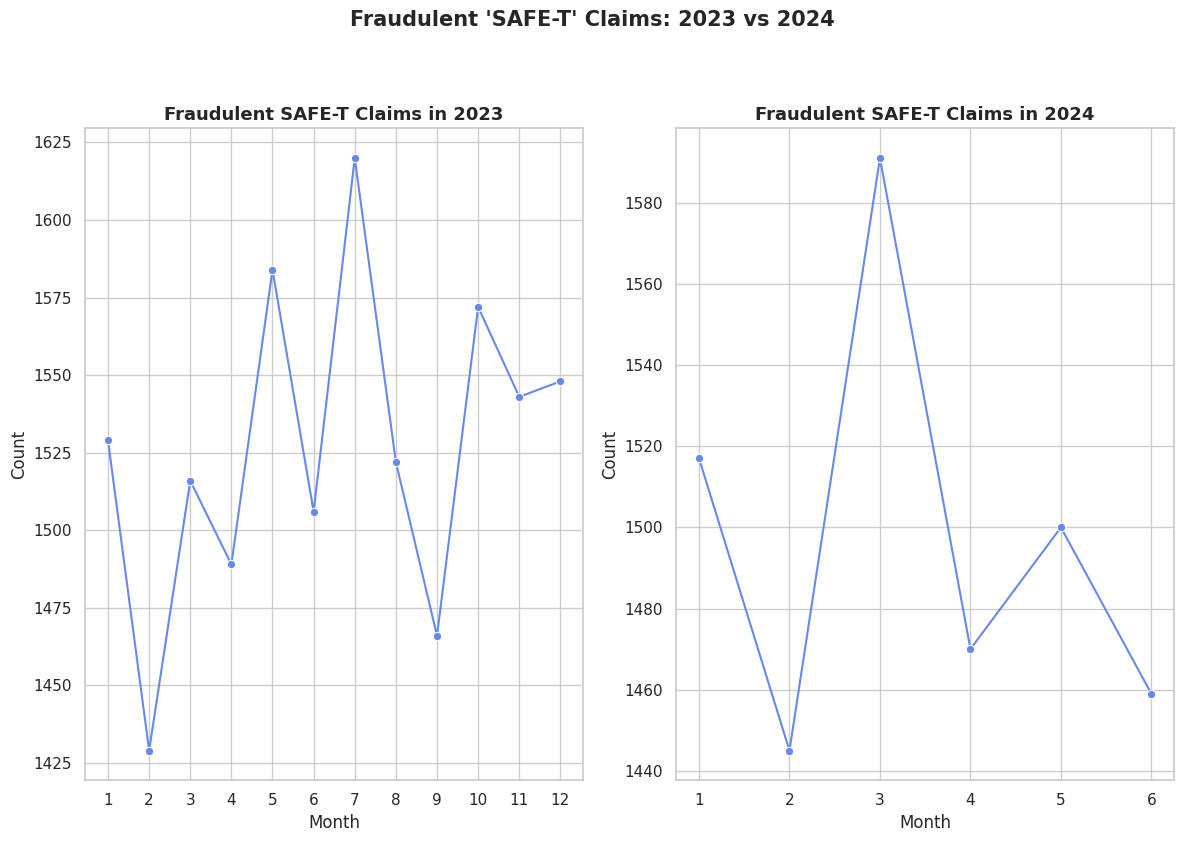

In [75]:
claim_trends('SAFE-T')

Fraud patterns differ across claim types.

SAFE-T fraud volume remains high and volatile, shows some stabilization in 2024.

OP fraud counts, while lower in volume, show  increase in 2024 compared to 2023.

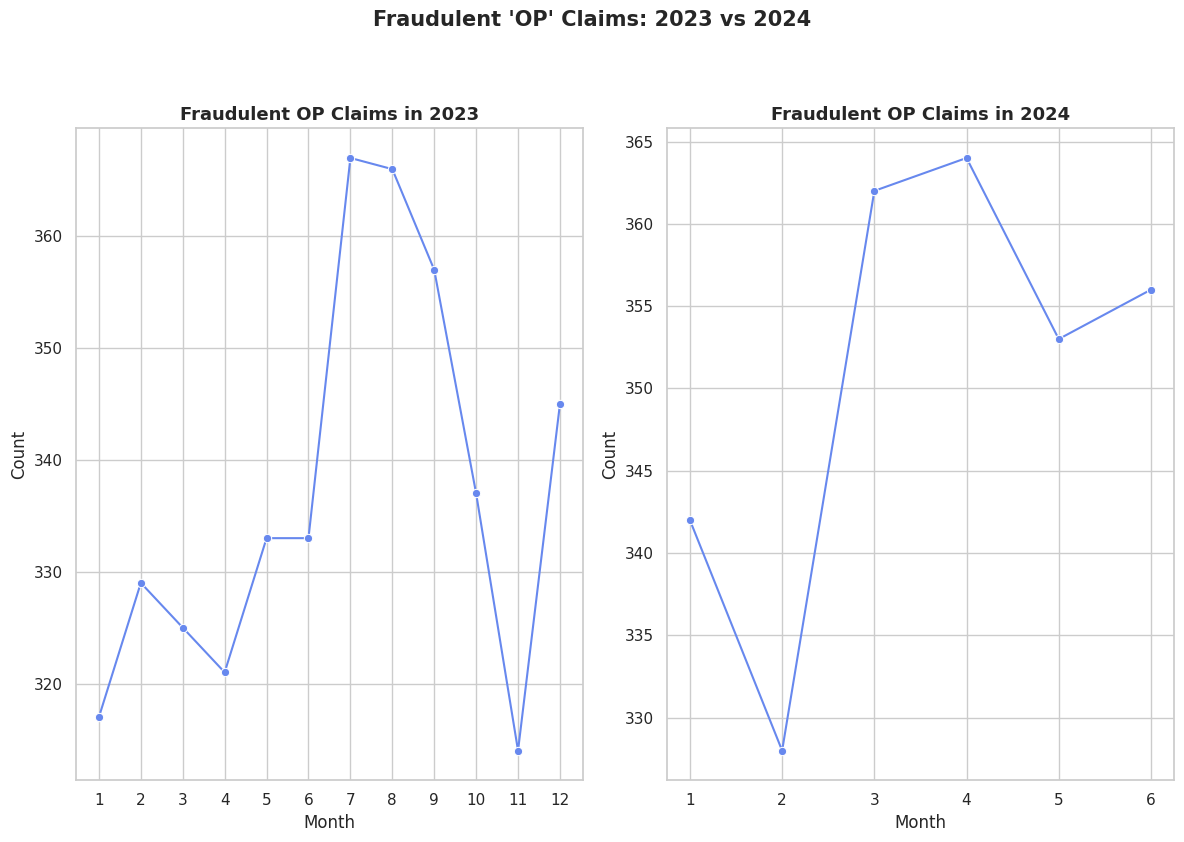

In [76]:
claim_trends('OP')

***`Resolution times by fraud_flag and claim_type`***

In [77]:
# Grouping by the Fraud Flag and Claim Type

df.groupby(['fraud_flag','claim_type'])['resolution_time_hours'].mean()

fraud_flag  claim_type
0           OP            20.985647
            OTC           20.948965
            SAFE-T        20.944045
1           OP            21.860901
            OTC           21.223693
            SAFE-T        21.461269
Name: resolution_time_hours, dtype: float64

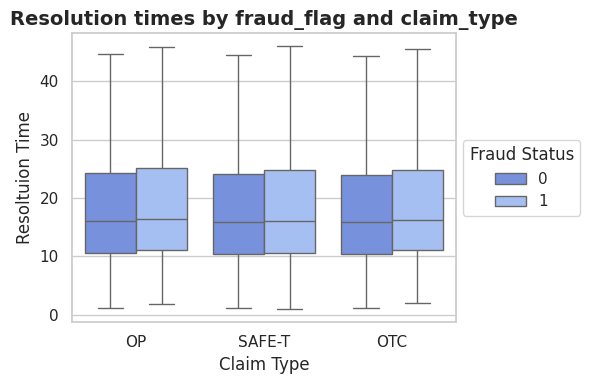

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(df,x='claim_type',y='resolution_time_hours',hue='fraud_flag',showfliers=False)
plt.title("Resolution times by fraud_flag and claim_type",fontsize=14,weight='bold')
plt.xlabel("Claim Type",fontsize=12)
plt.ylabel("Resoltuion Time",fontsize=12)
plt.legend(loc='center left',title='Fraud Status',bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

Based on the plot while there is a slight increase in median resolution time for claims flagged as fraudulent, the overall distribution and variability of resolution times are very similar across all claim types and fraud statuses.

But neither (claim type or fraud status) appears to have a major impact on the duration of the resolution process.

This suggests NO strong association between resolution times , claim type and fraud status

***`Outliers'***

<Axes: xlabel='claim_amount', ylabel='Density'>

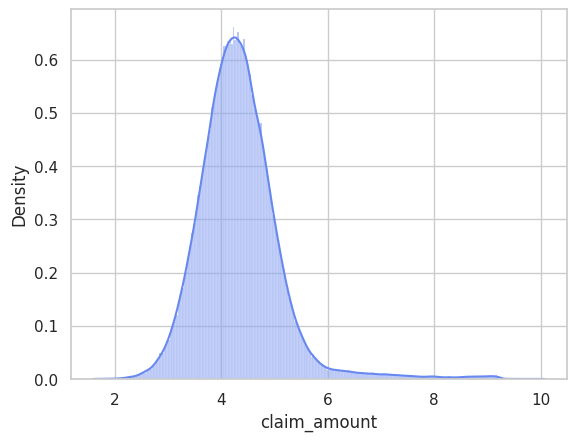

In [79]:
# Plotting the distribution of claim_amount and refund_amount to identify any outliers.

# Log transformed to compresses large values and expands small ones and become more normally distributed.

sns.histplot(df,x=np.log(df['claim_amount']),kde=True,stat='density')

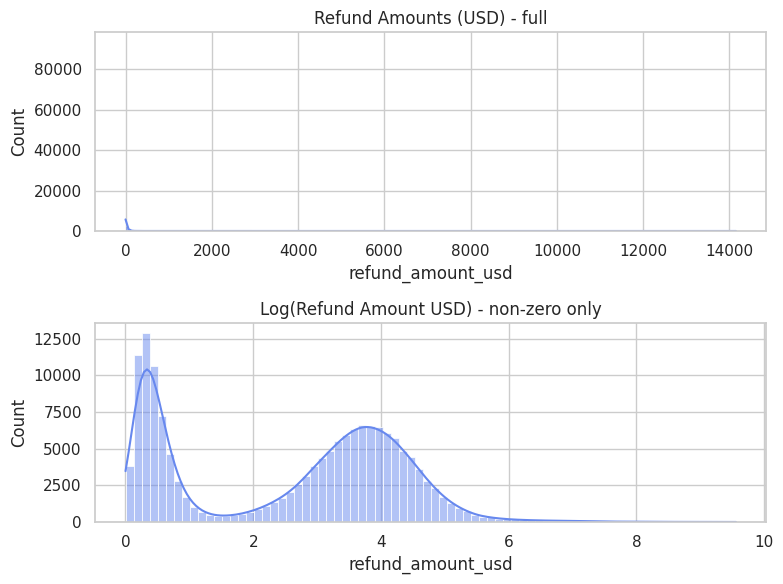

In [80]:
non_zero_refunds = df[df['refund_amount'] > 0]['refund_amount_usd']

plt.figure(figsize=(8, 6))

# First subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
sns.histplot(df['refund_amount_usd'], kde=True)
plt.title('Refund Amounts (USD) - full')

# Second subplot
plt.subplot(2, 1, 2)
sns.histplot(np.log1p(non_zero_refunds), kde=True)
plt.title('Log(Refund Amount USD) - non-zero only')

plt.tight_layout()
plt.show()


> **Observation:**  
> The refund amount distribution shows a large concentration at zero, reflecting the majority of legitimate cases with no refund issued.  
> After log transformation (and excluding zeros), the distribution normalizes, confirming genuine high-value variability among refunded claims.  
> These are not erroneous outliers but operationally valid high-value refunds.


## **4. Exploratory & Statistical Fraud Pattern Analysis**

This section represents the core analytical stage of the project — combining exploratory data analysis (EDA), statistical hypothesis testing, and visual insights to identify fraud trends across operational, behavioral, and financial dimensions.

The analysis was guided by a structured set of 20+ analytical questions originally designed to simulate the thought process of an Amazon Investigation Specialist, focusing on how fraud manifests across claim types, customer profiles, and operational workflows.

### Creating a Copy


In [81]:
# Creating a copy of the data set and keeping only required features
df.columns

Index(['transaction_id', 'customer_id', 'seller_id', 'event_time',
       'event_time_str', 'account_age_days', 'previous_claims_count',
       'claim_amount', 'refund_amount', 'hour_of_day', 'day_of_week',
       'is_weekend', 'claim_type', 'claim_reason', 'payment_method',
       'device_type', 'browser', 'region', 'state_code', 'chargebacks_count',
       'disputes_count', 'repeat_fraud_attempts', 'resolution_time_hours',
       'investigator_id', 'fraud_probability_score', 'fraud_flag',
       'investigation_outcome', 'refund_issued', 'partial_refund_flag',
       'customer_claim_frequency_90d', 'seller_claim_frequency_90d',
       'ip_address', 'device_id_hash', 'browser_language', 'geo_risk_score',
       'anomaly_indicator', 'days_since_last_claim', 'is_prime_customer',
       'correct_refund_issued_flag', 'correct_partial_refund_flag', 'currency',
       'rate_to_usd', 'refund_amount_usd', 'claim_amount_usd'],
      dtype='object')

In [82]:
df1=df.copy()

In [83]:
df1=df1[['transaction_id', 'customer_id', 'seller_id', 'event_time',
    'account_age_days', 'previous_claims_count','claim_amount','claim_amount_usd',
    'refund_amount','refund_amount_usd','claim_type', 'claim_reason', 'payment_method','is_weekend',
    'device_type', 'browser', 'region', 'state_code', 'chargebacks_count',
    'disputes_count', 'repeat_fraud_attempts', 'resolution_time_hours',
    'investigator_id', 'fraud_probability_score', 'fraud_flag',
    'investigation_outcome','ip_address', 'device_id_hash',
    'browser_language', 'geo_risk_score','anomaly_indicator', 'days_since_last_claim',
    'is_prime_customer','correct_refund_issued_flag', 'correct_partial_refund_flag']]

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 201999
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   transaction_id               200000 non-null  object        
 1   customer_id                  200000 non-null  object        
 2   seller_id                    200000 non-null  object        
 3   event_time                   200000 non-null  datetime64[ns]
 4   account_age_days             200000 non-null  int64         
 5   previous_claims_count        200000 non-null  int64         
 6   claim_amount                 200000 non-null  float64       
 7   claim_amount_usd             200000 non-null  float64       
 8   refund_amount                200000 non-null  float64       
 9   refund_amount_usd            200000 non-null  float64       
 10  claim_type                   200000 non-null  object        
 11  claim_reason                 20

### **1. Fraud Rate & Distribution Analysis**

This segment explores how fraud rates vary across categorical and operational features such as claim type, region, and claim reason and how fraud probability scores vary across region.

The objective is to detect statistically significant variations that can inform risk segmentation and process prioritization.

#### **1. Fraud Rate Comparison Across Claim Types**

  claim_type   total  fraud_count  fraud_rate
2     SAFE-T  100197        27306   27.252313
0         OP   49959         6149   12.308093
1        OTC   49844         6128   12.294358


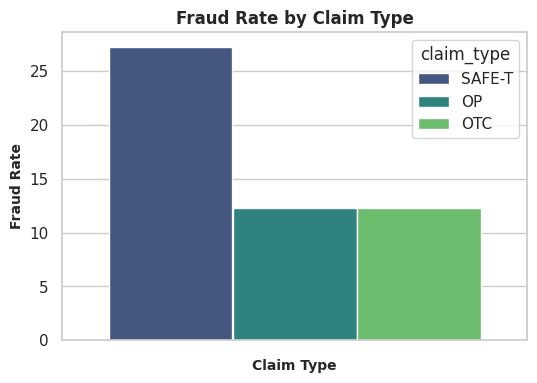

In [85]:
# Grouping the values by claim type to asses the total count, sum of fraud and fraud rates
fraud_by_claim_type = df1.groupby('claim_type')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_claim_type=fraud_by_claim_type.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_by_claim_type['fraud_rate'] = (fraud_by_claim_type['fraud_count'] / fraud_by_claim_type['total'])*100

fraud_by_claim_type = fraud_by_claim_type.sort_values('fraud_rate', ascending=False)

print(fraud_by_claim_type)

# Plotting the values of fraud rate vs Claim Type
plt.figure(figsize=(6,4))
sns.barplot(fraud_by_claim_type,y='fraud_rate', hue='claim_type', palette='viridis')
plt.title('Fraud Rate by Claim Type',fontsize=12,weight='bold')
plt.ylabel('Fraud Rate',fontsize=10,weight='bold')
plt.xlabel('Claim Type',fontsize=10,weight='bold')
plt.savefig('fraud_rate_by_claim_type.png', dpi=300, bbox_inches='tight')
plt.show()



In [86]:
# - Contingency table to analyze fraud flag distribution across claim types.
observed=pd.crosstab(df1['claim_type'],df1['fraud_flag'])

# - Stating the Hypotheseis

"Ho: the categorical variables claim types are independent"
"Ha : the variables claim types are associated"


# chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(observed)

# Calculating Cramér's V
n = observed.sum().sum()  # total number of observations
min_dim = min(observed.shape) - 1  # min(#rows, #cols) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Chi-square statistic:", chi2)
print("\n")
print("Cramér's V:", cramers_v)
print("\n")
print("Degrees of freedom:", dof)
print("\n")
print("P-value:", p)

Chi-square statistic: 7040.678263120666


Cramér's V: 0.1876256680617109


Degrees of freedom: 2


P-value: 0.0


Claim type is moderately associated with fraud likelihood,SAFE-T claims had a much higher fraud rate (27.25%) compared to OP (12.31%) and OTC (12.29%).

Chi-Square test revealed a statistically significant relationship between claim type and fraud occurrence (χ² = 7040.68, p=0.0).
The Cramér’s V value (0.188) indicates a weak to moderate strength of association

This suggests that claim type could be a useful feature for risk scoring or fraud detection models.

#### **2. Fraud Rate Variation Across Weekdays and Weekends**

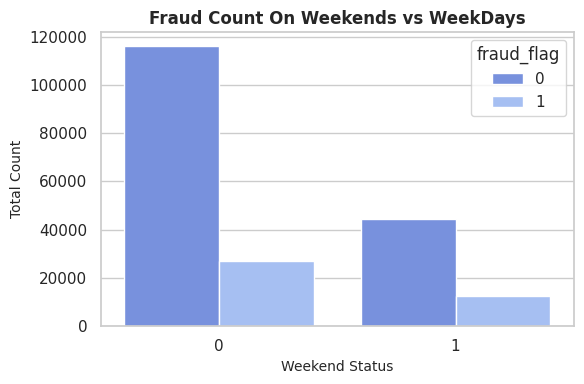

In [87]:
# Fraud distribution on weekends versus weekdays using a bar plot

plt.figure(figsize=(6,4))
sns.countplot(df1,x='is_weekend',hue='fraud_flag')
plt.title("Fraud Count On Weekends vs WeekDays",fontsize=12,weight='bold')
plt.xlabel("Weekend Status",fontsize=10)
plt.ylabel("Total Count",fontsize=10)
plt.tight_layout()
plt.show()

In [88]:
# Grouping the values by is_weekend to asses the total count, sum of fraud and fraud rates

fraud_by_week = df1.groupby('is_weekend')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_week=fraud_by_week.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_by_week['fraud_rate'] = (fraud_by_week['fraud_count'] / fraud_by_week['total'])*100

fraud_by_week = fraud_by_week.sort_values('fraud_rate', ascending=False)

fraud_by_week

,is_weekend,total,fraud_count,fraud_rate
1,1,56999,12601,22.107405
0,0,143001,26982,18.868400


There is a practically meaningful and likely statistically significant increase in fraud rates during weekends(17%)

This suggests weekends may be a higher-risk period, possibly due to reduced monitoring, staffing, or policy controls.

#### **3. Regional Differences in Fraud Rates**

  region  total  fraud_count  fraud_rate
6     JP   8015         1656   20.661260
7     SG   5977         1221   20.428309
1     AU   8032         1631   20.306275
3     DE   7895         1575   19.949335
9     US  67856        13515   19.917178
4     FR   5949         1175   19.751219
5     IN  64079        12633   19.714727
8     UK  14119         2711   19.201077
2     CA  14103         2707   19.194498
0     AE   3975          759   19.094340


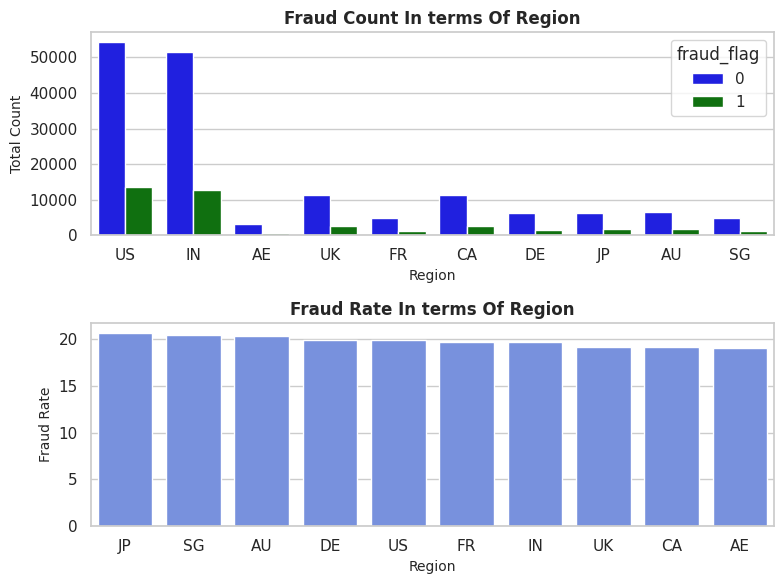

In [89]:
# # Grouping the values by region to asses the total count, sum of fraud and fraud rates

fraud_region=df1.groupby('region')['fraud_flag'].agg(['count','sum']).reset_index()

fraud_region=fraud_region.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_region['fraud_rate'] = (fraud_region['fraud_count'] / fraud_region['total'])*100

fraud_region=fraud_region.sort_values(by=['fraud_rate'],ascending=False)
print(fraud_region)


# Count plot to investigate fraud flag distribution by region.
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
sns.countplot(df1,x='region',hue='fraud_flag',palette=["Blue","Green"])
plt.title('Fraud Count In terms Of Region',fontsize=12,weight='bold')
plt.xlabel("Region",fontsize=10)
plt.ylabel("Total Count",fontsize=10)


plt.subplot(2,1,2)
sns.barplot(fraud_region,x='region',y='fraud_rate')
plt.title('Fraud Rate In terms Of Region',fontsize=12,weight='bold')
plt.xlabel("Region",fontsize=10)
plt.ylabel("Fraud Rate",fontsize=10)

plt.tight_layout()
plt.show()

In [90]:
"Ho= there is NO assocation betwwen Region of transaction and fraud status"

"Ha = Region affects the fraud status"

from scipy.stats import chi2_contingency

# Contingency table
ct = pd.crosstab(df1['region'], df1['fraud_flag'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Chi-square p-value:", p)
print("Cramér's V:", cramers_v)

# print("Sample size:", ct.sum().sum())
# print("Region counts:\n", ct.sum(axis=1))


Chi-square p-value: 0.08522012334674849
Cramér's V: 0.008721843607118484


Although fraud rates show minor variation across regions (ranging from ~19% to 20.6%), the Chi-square test of independence indicates that this variation is not statistically significant.

Chi-square p-value: 0.085 > 0.05 → We fail to reject the null hypothesis, meaning there's no strong statistical evidence that fraud occurrence is associated with region.

Cramér’s V: 0.0087 → The effect size is negligible, suggesting that even if a weak relationship exists, it has no meaningful practical impact.

In summary, region does not significantly influence fraud likelihood, and is unlikely to be a useful standalone feature for fraud detection models.

#### **4. Fraud Rate Variation by Device Type**

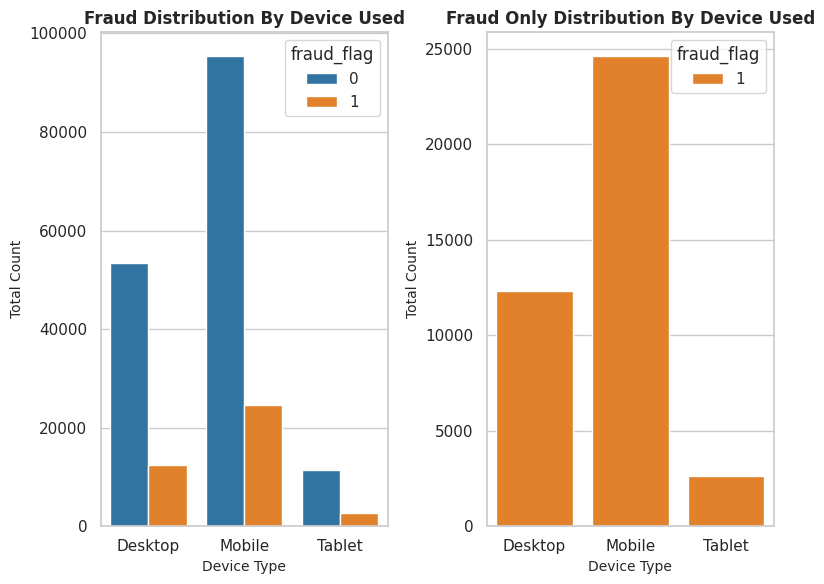

In [91]:
# Comparing fraud rates between mobile, desktop, and tablet devices using a countplot.

plt.figure(figsize=(8,6))
fraud_palette = {0: '#1f77b4', 1: '#ff7f0e'}

plt.subplot(1,2,1)
sns.countplot(df1,x='device_type',hue='fraud_flag',palette=fraud_palette)
plt.title('Fraud Distribution By Device Used',fontsize=12,weight='bold')
plt.xlabel("Device Type",fontsize=10)
plt.ylabel("Total Count",fontsize=10)

plt.subplot(1,2,2)
temp=df1[df1['fraud_flag']==1]
sns.countplot(temp,x='device_type',hue='fraud_flag',palette=fraud_palette)
plt.title('Fraud Only Distribution By Device Used',fontsize=12,weight='bold')
plt.xlabel("Device Type",fontsize=10)
plt.ylabel("Total Count",fontsize=10)

plt.tight_layout()
plt.show()


  device_type   total  fraud_count  fraud_rate
1      Mobile  120072        24619   20.503531
0     Desktop   65840        12329   18.725699
2      Tablet   14088         2635   18.703861


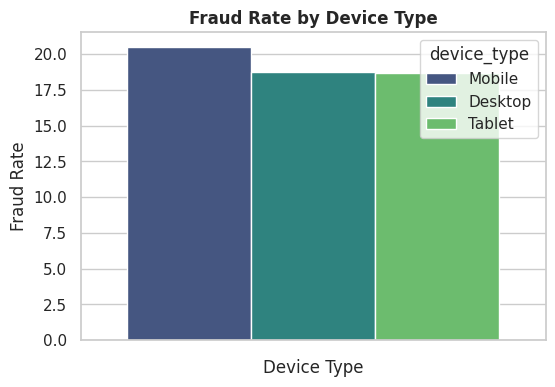

In [92]:
# Grouping the values by device_type to asses the total count, sum of fraud and fraud rates

fraud_by_device = df1.groupby('device_type')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_device=fraud_by_device.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_by_device['fraud_rate'] = (fraud_by_device['fraud_count'] / fraud_by_device['total'])*100

fraud_by_device = fraud_by_device.sort_values('fraud_rate', ascending=False)

print(fraud_by_device)

# Plotting the rates of fraud against Device Types
plt.figure(figsize=(6,4))
sns.barplot(fraud_by_device,y='fraud_rate', hue='device_type', palette='viridis')
plt.title('Fraud Rate by Device Type',weight='bold')
plt.ylabel('Fraud Rate')
plt.xlabel('Device Type')
plt.show()

Fraud occurs across all device types, but it is most frequent and most likely on mobile devices:

Mobile accounts for the largest number of total transactions and fraud cases.

It also has the highest fraud rate (20.5%), meaning roughly 1 in 5 mobile transactions are fraudulent.

In [93]:
from scipy.stats import chi2_contingency

# Create a contingency table
observed = pd.crosstab(df1['device_type'], df1['fraud_flag'])

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Cramér's V
n = observed.sum().sum()
min_dim = min(observed.shape) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print("Chi2 Statistic:", chi2_stat)
print("P-value:", p_val)
print("Cramér’s V:", cramers_v)


Chi2 Statistic: 95.95940195345221
P-value: 1.4543891381563508e-21
Cramér’s V: 0.021904269213266648


While fraud is slightly more likely on mobile devices, the difference is statistically significant but practically small.

Device type may offer some predictive value, but likely not strong enough to use in isolation for fraud detection.

#### **5. Fraud Rate Comparison by Claim Reason**

In [94]:
df['claim_reason'].unique()

array(['damaged', 'not_as_described', 'wrong_item', 'counterfeit',
       'empty_box', 'return_abuse', 'item_not_received', 'payment_issue',
       'late_delivery', 'unknown'], dtype=object)

        claim_reason  total  fraud_count  fraud_rate
0        counterfeit  21873         5883   26.896173
3  item_not_received  21681         5762   26.576265
7       return_abuse  21851         5657   25.888975
8            unknown   4033          822   20.381850
2          empty_box  21781         3644   16.730178
5   not_as_described  21834         3610   16.533846
6      payment_issue  21644         3572   16.503419
4      late_delivery  21721         3549   16.339027
9         wrong_item  21772         3543   16.273195
1            damaged  21810         3541   16.235672


/tmp/ipython-input-258433425.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(fraud_by_cr,x='fraud_rate',y='claim_reason',palette='Reds_r' )


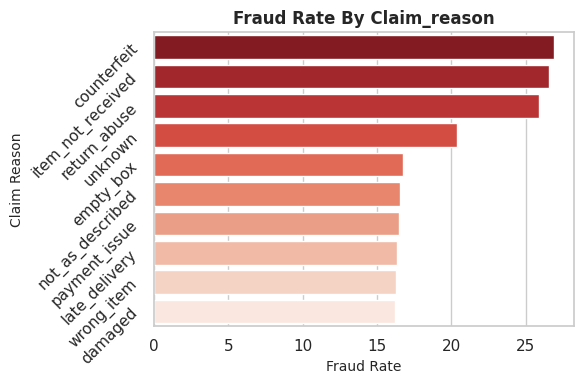

In [95]:
## Grouping the values by claim_reason to asses the total count, sum of fraud and fraud rates
fraud_by_cr=df1.groupby('claim_reason')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_cr=fraud_by_cr.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_by_cr['fraud_rate'] = (fraud_by_cr['fraud_count'] / fraud_by_cr['total'])*100

fraud_by_cr=fraud_by_cr.sort_values(by='fraud_rate',ascending=False)
print(fraud_by_cr)

# Barplot to analyze fraud rates across different claim reasons.
plt.figure(figsize=(6,4))
sns.barplot(fraud_by_cr,x='fraud_rate',y='claim_reason',palette='Reds_r' )
plt.title('Fraud Rate By Claim_reason',fontsize=12,weight='bold')
plt.xlabel("Fraud Rate",fontsize=10)
plt.yticks(rotation=45)
plt.ylabel("Claim Reason",fontsize=10)
plt.tight_layout()
plt.show()



I analyzed how fraud rates vary across different claim reasons by calculating the percentage of fraudulent claims within each category.

The top 3 claim reasons with the highest fraud rates are:

Counterfeit (26.9%)

Item Not Received (26.6%)

Return Abuse (25.9%)

These categories may be more vulnerable to abuse due to their subjective nature, lack of physical proof, or ease of exploitation.

In contrast, reasons like Damaged, Wrong Item, or Late Delivery show fraud rates around 16%, suggesting they are more frequently used in legitimate claims.

The "Unknown" category also had a relatively high fraud rate (20.4%), which may reflect poor data quality or user manipulation of claim metadata.

This insight can help prioritize fraud detection efforts by focusing on high-risk claim reasons.

In [96]:
"Ho= there is NO assocation betwwen claim reason and fraud"

"Ha = claim type affects the fraud"


from scipy.stats import chi2_contingency

# Creating a Contingency Table
observed=pd.crosstab(df1['claim_reason'],df1['fraud_flag'])

chi_stat , p_val , dof , expected_freq = chi2_contingency(observed)

# Cramers Value for size estimation
n = observed.sum().sum()  # total number of observations
min_dim = min(observed.shape) - 1  # min(#rows, #cols) - 1
cramers_v = np.sqrt(chi_stat / (n * min_dim))

print("Cramér's V:", cramers_v)
print("\n")
print("P-value:", p_val)

Cramér's V: 0.11758835018329913


P-value: 0.0


The extremely low p-value (< 0.05) indicates that there is a statistically significant association between claim_reason and fraud_flag. In other words, fraud rates varies meaningfully across claim reasons.

However, the Cramér’s V value of 0.118 suggests that while the relationship is statistically significant, the effect size is small. This means that although claim reason influences fraud, it is not a strong predictor on its own

#### **6. Fraud Likelihood Variation by Customer Prime Status**

In [97]:
df1['is_prime_customer'].unique()

array(['Yes', 'No'], dtype=object)

  is_prime_customer   total  fraud_count  fraud_rate
0                No  109634        21780   19.866100
1               Yes   90366        17803   19.700994


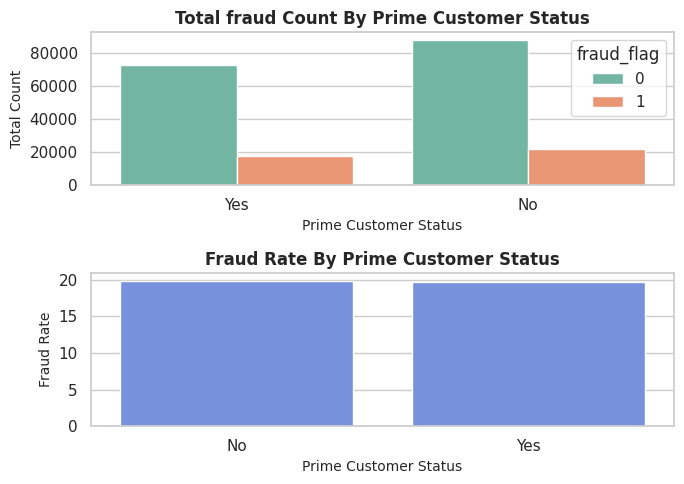

In [98]:
# Grouping the values by is_prime_customer to asses the total count, sum of fraud and fraud rates
fraud_prime_ct=df1.groupby('is_prime_customer')['fraud_flag'].agg(['count','sum']).reset_index()

fraud_prime_ct=fraud_prime_ct.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_prime_ct['fraud_rate'] = (fraud_prime_ct['fraud_count'] / fraud_prime_ct['total'])*100

print(fraud_prime_ct)

# Plotting to observe the results
plt.figure(figsize=(7,5))

plt.subplot(2,1,1)
sns.countplot(df1,x='is_prime_customer',hue='fraud_flag',palette='Set2')
plt.title('Total fraud Count By Prime Customer Status',fontsize=12,weight='bold')
plt.xlabel("Prime Customer Status",fontsize=10)
plt.ylabel("Total Count",fontsize=10)

plt.subplot(2,1,2)
sns.barplot(fraud_prime_ct,x='is_prime_customer',y='fraud_rate')
plt.title('Fraud Rate By Prime Customer Status',fontsize=12,weight='bold')
plt.xlabel("Prime Customer Status",fontsize=10)
plt.ylabel("Fraud Rate",fontsize=10)

plt.tight_layout()
plt.show()


#### **7. Geographic Correlation of Fraud Probability**


  region      mean   median
0     AE  0.199659  0.20370
1     AU  0.199027  0.20345
2     CA  0.198968  0.20400
3     DE  0.200050  0.20450
4     FR  0.198648  0.20410
5     IN  0.199197  0.20450
6     JP  0.198773  0.20240
7     SG  0.196230  0.20130
8     UK  0.199275  0.20380
9     US  0.199116  0.20360


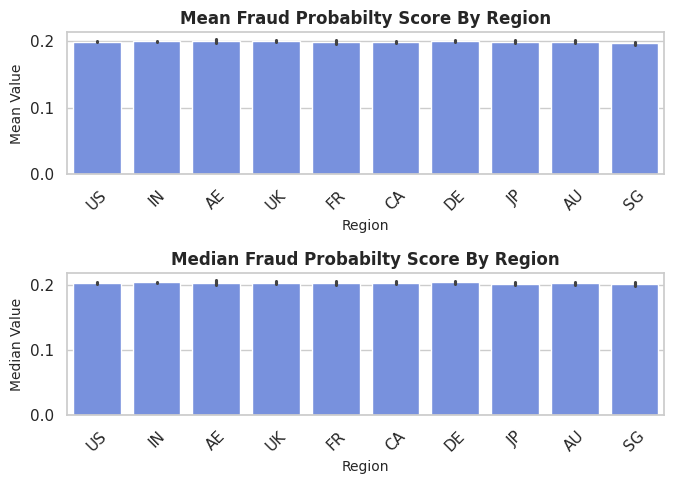

In [99]:
# Grouping the values by claim_reason to asses the total count, sum of fraud and fraud rates

fraud_prob_region_score=df1.groupby('region')['fraud_probability_score'].agg(['mean','median']).reset_index()

fraud_prob_region_score.rename(columns={'mean': 'mean_fraud_prob_score', 'median': 'median_fraud_prob_score'})

print(fraud_prob_region_score)


# Visualizing fraud probability distribution across different geographic regions using a bar plot.
plt.figure(figsize=(7,5))

plt.subplot(2,1,1)
sns.barplot(df1,x='region',y='fraud_probability_score',estimator='mean')
plt.title('Mean Fraud Probabilty Score By Region',fontsize=12,weight='bold')
plt.xlabel("Region",fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Mean Value",fontsize=10)


plt.subplot(2,1,2)
sns.barplot(df1,x='region',y='fraud_probability_score',estimator='median')
plt.title('Median Fraud Probabilty Score By Region',fontsize=12,weight='bold')
plt.xlabel("Region",fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Median Value",fontsize=10)

plt.tight_layout()
plt.show()


In [100]:
"Ho: The means probability fraud scores across different regions are equal "
"Ha: The probability fraud scores differs across atleast 1 group  "

from scipy.stats import f_oneway

# creating data groups
groups = [df1[df1['region'] == r]['fraud_probability_score'] for r in df1['region'].unique()]

# One-way ANOVA
f_stat, p_val = f_oneway(*groups)
print("ANOVA p-value:", p_val)



ANOVA p-value: 0.7016620020447222


There is no statistically significant difference in fraud probability scores across regions (ANOVA p = 0.7017).

Additionally, both the mean and median fraud probabilities are nearly identical for all regions, confirming that geographic region does not meaningfully influence the fraud probability score.

### **2. Customer Behavior & Claim Frequency Patterns**

This section focuses on customer behavior, claim history, and account-level attributes that correlate with fraud occurrence.

These factors often reveal patterns of repeat abuse, high-risk account tenure, or unusual claim recurrence.

#### **1. Correlation Between Fraud Probability and Previous Claim Count**

In [101]:
df_cc=df1.copy()
# creating a copy so that creating a an adiitional column of claimant_category is not nessecary

In [102]:
# Checking the range of values of previous claim count
df_cc['previous_claims_count'].value_counts()

,count
previous_claims_count,
0,94842
1,65542
2,23041
3,5790
4,1673
5,947
6,891
12,869
7,863


In [103]:
# Creating a function to bin the classes into 4 categories so as to reduce noise from highers claim counts and improve
# the intrepratabilty of the values

def classify_claimant(x):
    if x == 0:
        return 'First-time'
    elif x == 1:
        return 'One prior claim'
    elif x == 2:
        return 'Two prior claims'
    else:
        return 'Frequent claimant'

df_cc['claimant_category'] = df_cc['previous_claims_count'].apply(classify_claimant)

In [104]:
# Checking the count of binned values

df_cc['claimant_category'].value_counts()

,count
claimant_category,
First-time,94842
One prior claim,65542
Two prior claims,23041
Frequent claimant,16575


In [105]:
# Finding th emean score by grouping wrt to claimant category

fraud_cat=df_cc.groupby('claimant_category')['fraud_probability_score'].mean().reset_index(name='mean_fraud_probability_score').round(3)

fraud_cat


,claimant_category,mean_fraud_probability_score
0,First-time,0.192
1,Frequent claimant,0.226
2,One prior claim,0.200
3,Two prior claims,0.208


In [106]:
# Extracting the first value  from the claimant category to calculate percent difference between the
# the categories
first_time_score=fraud_cat.iloc[0:1,1].values

first_time_score

array([0.192])

   claimant_category  mean_fraud_probability_score  pct_diff_from_first_time
0         First-time                         0.192                      0.00
2    One prior claim                         0.200                      4.17
3   Two prior claims                         0.208                      8.33
1  Frequent claimant                         0.226                     17.71


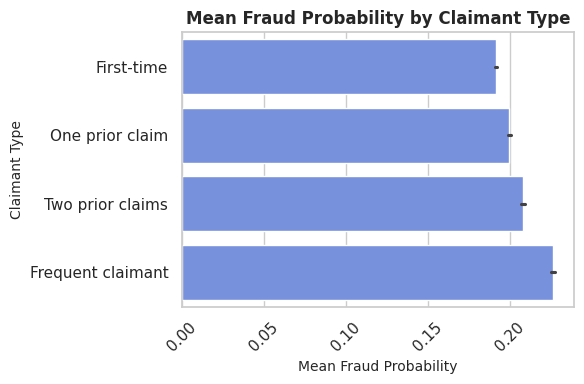

In [107]:
# Calculting percentage difference of scores between first and other catgories
fraud_cat['pct_diff_from_first_time'] = (
    (fraud_cat['mean_fraud_probability_score'] - first_time_score) / first_time_score * 100
).round(2)

print(fraud_cat.sort_values(by='pct_diff_from_first_time'))

# Plotting the values in accordance with percentage difference of mean_fraud_probability_score
plt.figure(figsize=(6,4))
sns.barplot(data=df_cc, y='claimant_category', x='fraud_probability_score', estimator='mean', order=[
    'First-time', 'One prior claim', 'Two prior claims', 'Frequent claimant'
])
plt.xlabel("Mean Fraud Probability",fontsize=10)
plt.ylabel("Claimant Type",fontsize=10)
plt.title("Mean Fraud Probability by Claimant Type",fontsize=12,weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [108]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00


In [109]:
# Importing pingouin for ANOVA test

from pingouin import welch_anova

welch_anova(dv='fraud_probability_score', between='claimant_category', data=df_cc)


,Source,ddof1,ddof2,F,p-unc,np2
0,claimant_category,3,52902.912234,697.188625,0.0,0.010308


Although the average fraud probability score increases with the number of previous claims — from 0.1916 for first-time claimants to 0.2264 for frequent claimants (an ~18% relative increase) — the practical impact of this trend is limited when considered in isolation.

A Welch’s ANOVA test confirmed the difference is statistically significant (p < 0.001), meaning it’s unlikely due to chance. However, the effect size is small (partial eta squared ≈ 0.0103), indicating that claimant history explains only about 1% of the variance in fraud probability scores.

#### **2. Impact of Customer Account Age on Fraud Likelihood**

In [110]:
# using the earlier created df_cc , so that grouping of Account age does not create a feature in df1

In [111]:
df_cc['account_age_days'].value_counts(ascending=False)

,count
account_age_days,
353,595
361,585
391,582
386,577
343,576
...,...
1258,1
1189,1
1311,1


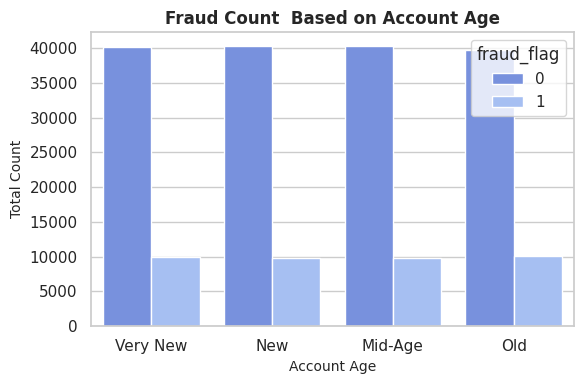

In [112]:
# Bining `account_age_days` into categories and compare fraud rates across these bins.
df_cc['account_age_bins']=pd.qcut(df_cc['account_age_days'], q=4,
         labels=['Very New', 'New', 'Mid-Age', 'Old'])


plt.figure(figsize=(6,4))
sns.countplot(df_cc,x='account_age_bins',hue='fraud_flag')
plt.title("Fraud Count  Based on Account Age",fontsize=12,weight='bold')
plt.xlabel("Account Age",fontsize=10)
plt.ylabel("Total Count",fontsize=10)
plt.tight_layout()
plt.show()




In [113]:
# Grouping the values by is_weekend to asses the total count, sum of fraud and fraud rates

fraud_by_acc_age = df_cc.groupby('account_age_bins')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_acc_age=fraud_by_acc_age.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_by_acc_age['fraud_rate'] = (fraud_by_acc_age['fraud_count'] / fraud_by_acc_age['total'])*100

fraud_by_acc_age = fraud_by_acc_age.sort_values('fraud_rate', ascending=False)

fraud_by_acc_age

/tmp/ipython-input-387125004.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_acc_age = df_cc.groupby('account_age_bins')['fraud_flag'].agg(['count', 'sum']).reset_index()


,account_age_bins,total,fraud_count,fraud_rate
3,Old,49806,10038,20.154198
0,Very New,50041,9896,19.775784
2,Mid-Age,50086,9836,19.638222
1,New,50067,9813,19.599736


In [114]:
# Performing chi-square test to asses the significane of account age on fraud

"Ho= there is no asscoation between the number of days since customer started and Fraud"
"Ha= fraud and regions are asscoiated"

# Creating a Contingency Table
observed=pd.crosstab(df_cc['account_age_bins'],df_cc['fraud_flag'])

from scipy.stats import chi2_contingency

Chi_statistic , p_val , dof , expected_freq= chi2_contingency(observed)

# Calculate Cramér's V
n = observed.sum().sum()  # total number of observations
min_dim = min(observed.shape) - 1  # min(#rows, #cols) - 1
cramers_v = np.sqrt(Chi_statistic / (n * min_dim))

print("Chi-square statistic:", Chi_statistic)
print("\n")
print("Cramér's V:", cramers_v)
print("\n")
print("P-value:", p_val)

Chi-square statistic: 6.036231134031925


Cramér's V: 0.0054937378596143106


P-value: 0.1098607455660923


Fraud rates across all groups are very similar, ranging from 19.60% to 20.15%.

A Chi-squared test of independence produced a p-value of 0.11, meaning the differences are not statistically significant.
The Cramér’s V = 0.0055 indicates a negligible effect size.

It can be said that Account age does not meaningfully affect the likelihood of fraud, and is unlikely to be a useful predictor in isolation.

#### **3. Fraud Frequency Trend Over Time Since Last Claim**

In [115]:
df1['days_since_last_claim'].value_counts(ascending=False).head(15)

,count
days_since_last_claim,
0.2,969
0.3,956
0.6,939
0.4,937
0.1,922
0.7,912
0.5,909
0.8,895
1.5,876


In [116]:
df1.groupby('fraud_flag')['days_since_last_claim'].agg(['mean', 'median', 'std'])

,mean,median,std
fraud_flag,,,
0,31.144414,18.6,36.857815
1,30.513678,17.9,36.499280


The average time since last claim was very similar for fraudulent (mean = 30.5 days, median = 17.9) and non-fraudulent claims (mean = 31.1 days, median = 18.6).

This suggests no clear relationship between the timing of previous claims and fraud occurrence.

#### **4. Fraud Frequency Comparison Between First-Time and Returning Claimants**

In [117]:
# Checking the variation in previous claims count

df_cc['previous_claims_count'].value_counts()

,count
previous_claims_count,
0,94842
1,65542
2,23041
3,5790
4,1673
5,947
6,891
12,869
7,863


In [118]:
# using the earlier created df_cc , so that grouping of Account age does not create a feature: claimant_type in df1

  claimant_type   total  fraud_count  fraud_rate
0    First-time   94842        18070   19.052740
1        Repeat  105158        21513   20.457787


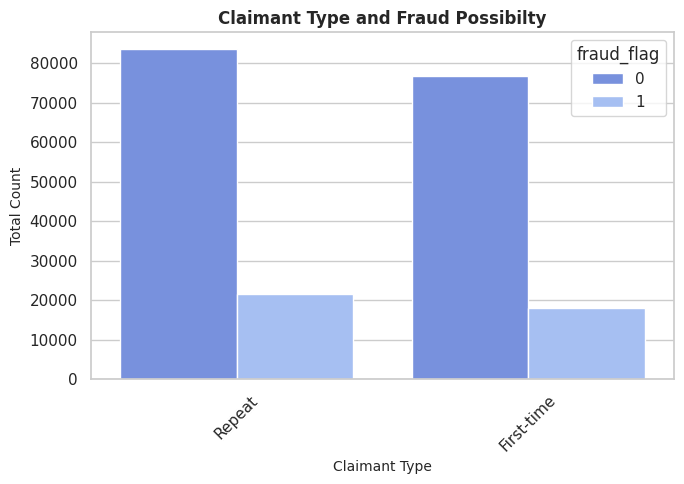

In [119]:
# Bining th evalues into 2 categories
df_cc['claimant_type'] = df_cc['previous_claims_count'].apply(lambda x: 'First-time' if x == 0 else 'Repeat')


# Grouping the values by claimant_type to asses the total count, sum of fraud and fraud rates
fraud_claim_ct=df_cc.groupby('claimant_type')['fraud_flag'].agg(['count','sum']).reset_index()

fraud_claim_ct=fraud_claim_ct.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_claim_ct['fraud_rate'] = (fraud_claim_ct['fraud_count'] / fraud_claim_ct['total'])*100

print(fraud_claim_ct)

# bar plot to compare fraud flag distribution for first-time claimants vs repeat claimants
plt.figure(figsize=(7,5))
sns.countplot(df_cc,x='claimant_type',hue='fraud_flag')
plt.title('Claimant Type and Fraud Possibilty',fontsize=12,weight='bold')
plt.xlabel("Claimant Type",fontsize=10)
plt.xticks(rotation=45)
plt.ylabel("Total Count",fontsize=10)
plt.tight_layout()
plt.show()


Although repeat claimants exhibit a slightly higher fraud rate, the difference is not practically meaningful, and claimant type alone is not a strong predictor of fraud.

In [120]:
"Ho= there is NO assocation between previous claim count and fraud"

"Ha = previous claim count affects the fraud status"

# Create contingency table
ct = pd.crosstab(df_cc['claimant_type'], df_cc['fraud_flag'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-square p-value:", p)


n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("Cramér's V:", cramers_v)

Chi-square p-value: 3.565446269277417e-15
Cramér's V: 0.017596357536225196


Although a chi-square test shows a statistically significant association between being a first-time or repeat claimant and fraud occurrence, the effect size (Cramér’s V = 0.0176) is negligible.  

This suggests that while the relationship exists in the data, it is not strong enough to be practically useful for decision-making or fraud prediction.

#### **5. Correlation Between Resolution Time and Fraud Likelihood.**

<Axes: xlabel='resolution_time_hours', ylabel='Density'>

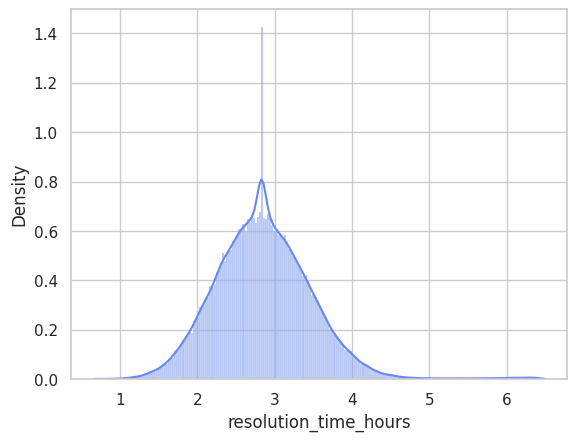

In [121]:
#  checking to see if log-transforming the resolution time to mitigate the impact of outliers

sns.histplot(data=df1, x=np.log1p(df1['resolution_time_hours']),kde=True,stat='density')

/tmp/ipython-input-4194504450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='fraud_flag', y=np.log1p(df1['resolution_time_hours']), palette='Set2',showfliers=False)


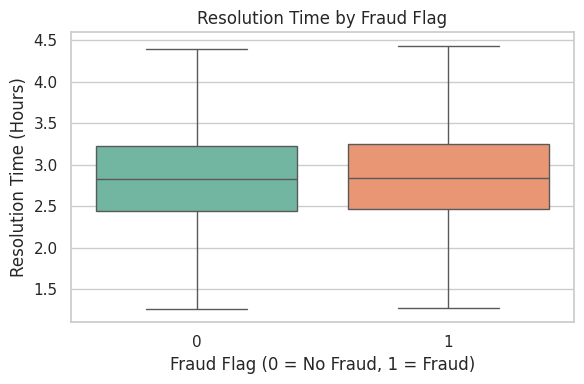

In [122]:
# A box plot to compare resolution time for fraud vs non-fraud claims.

plt.figure(figsize=(6,4))
sns.boxplot(data=df1, x='fraud_flag', y=np.log1p(df1['resolution_time_hours']), palette='Set2',showfliers=False)
plt.title('Resolution Time by Fraud Flag')
plt.xlabel('Fraud Flag (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Resolution Time (Hours)')
plt.tight_layout()
plt.show()


   fraud_flag   Total  mean_resolution_time
0           0  160417             20.956747
1           1   39583             21.486570


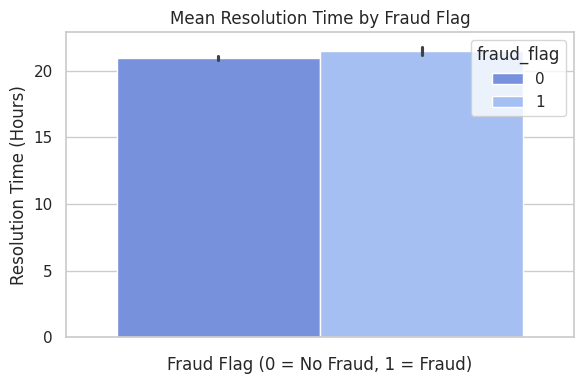

In [123]:
res_time=(
df1.groupby('fraud_flag').agg(Total=('resolution_time_hours','count'),
      mean_resolution_time=('resolution_time_hours','mean')).reset_index())

print(res_time)

plt.figure(figsize=(6,4))
sns.barplot(df1,y='resolution_time_hours',hue='fraud_flag',estimator='mean')
plt.title('Mean Resolution Time by Fraud Flag')
plt.xlabel('Fraud Flag (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Resolution Time (Hours)')
plt.tight_layout()
plt.show()

In [124]:
# Applying Independent T test to check Statistical Significance

"Ho= The means resolution time for fruad and not fraud claims are equal"

"Ha = The mean resolution times are not equal"

from scipy.stats import ttest_ind

# Creating 2 Independent Groups
group0 = np.log1p(df1[df1['fraud_flag'] == 0]['resolution_time_hours'])
group1 = np.log1p(df1[df1['fraud_flag'] == 1]['resolution_time_hours'])

stat, pval = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
print(f"T-test p-value: {pval}")


T-test p-value: 1.9387388889393662e-13


In [125]:
# Means and standard deviations
mean0 = group0.mean()
mean1 = group1.mean()
std0 = group0.std()
std1 = group1.std()

# Pooled standard deviation
pooled_std = np.sqrt((std0**2 + std1**2) / 2)

# Cohen's d to deteremine the Size
cohens_d = (mean1 - mean0) / pooled_std
print("Cohen's d:", cohens_d)


Cohen's d: 0.0412867373086701


After log-transforming resolution times, both distributions appear similar.
Despite a statistically significant t-test (p ≈ 1.9e–13), the effect size is minimal (Cohen’s d = 0.04), confirming that fraud-related cases take only marginally longer to resolve.

While the statistical test detects a difference due to the large sample size, this difference in resolution time between fraud and non-fraud cases is **negligible in real-world terms**. Therefore, optimizing resolution time based on fraud flag is unlikely to yield impactful business improvements.


### **3. Transaction & Financial Metrics Analysis**

This section examines the relationship between monetary attributes (refund amount, claim amount, resolution time) and fraud probability.

Financial variables often highlight claim patterns where loss exposure is statistically associated with fraudulent behavior.

#### **1. Correlation Between Refund Amount and Claim Amount**

Pearson Correlation Coefficient: 0.43007024751577216
P-value: 0.0


Spearman Correlation Coefficient: 0.5168001677736666
P-value: 0.0


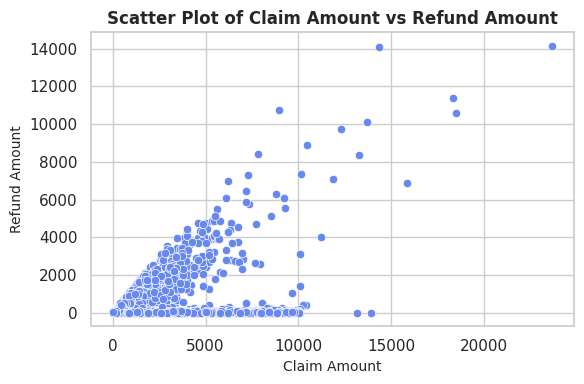

In [126]:
#  Performing Pearson correlation to check the relationship between claim_amount and refund_amount.

"Ho: No Linear corealtion between claim_amount and refund_amount."
"Ha: There is Linear corelation"

# Peasrosn Correlation
from scipy.stats import pearsonr

x=df1['claim_amount_usd']
y=df1['refund_amount_usd']

corr_coeff , p_val = pearsonr(x,y)

print("Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_val)

print("\n")

# Spearmans Corelation
from scipy.stats import spearmanr

rho, pval_s = spearmanr(df['claim_amount'], df['refund_amount'])

print("Spearman Correlation Coefficient:", rho)
print("P-value:", pval_s)


# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(df1,x='claim_amount',y='refund_amount')
plt.title("Scatter Plot of Claim Amount vs Refund Amount",fontsize=12,weight='bold')
plt.xlabel("Claim Amount",fontsize=10)
plt.ylabel("Refund Amount",fontsize=10)
plt.tight_layout()
plt.show()



Both Pearson and Spearman correlation tests show a statistically significant positive relationship between claim_amount and refund_amount.

Pearson’s r (0.412) suggests a moderate linear correlation, while Spearman’s ρ (0.517) indicates a stronger monotonic trend, implying that as claim amounts increase, refund amounts do as well, though the relationship is not perfectly linear.

#### **2. Effect of Refund Amount on Fraud Detection Rate**

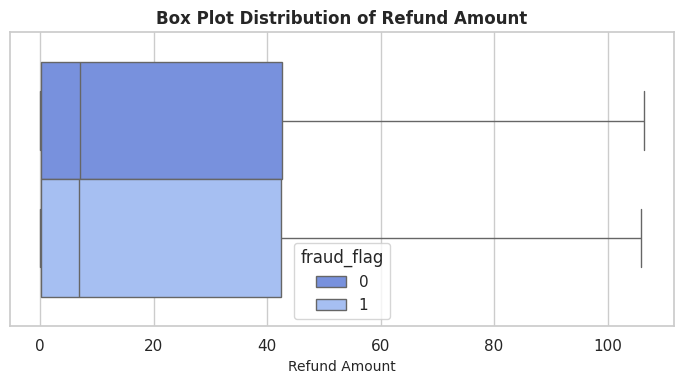

In [127]:
#Creating a box plot comparing `refund_amount` across different fraud flags.

plt.figure(figsize=(7,4))
sns.boxplot(df1,x='refund_amount_usd',hue='fraud_flag',showfliers=False)
plt.title("Box Plot Distribution of Refund Amount",fontsize=12,weight='bold')
plt.xlabel("Refund Amount",fontsize=10)
plt.tight_layout()
plt.show()

In [128]:
# Grouping the the values in terms of fraud flag to check mean , count , median values of refund amount

df1.groupby('fraud_flag')['refund_amount_usd'].agg(['count', 'mean', 'median', 'std']).reset_index()

,fraud_flag,count,mean,median,std
0,0,160417,34.579561,6.951668,127.885859
1,1,39583,34.494760,6.760698,119.569771


In [129]:
# Performing Indpenendent Test to compare the Means of each Group

" Ho : The refund amount of groups fraud and no fraud are equal"

"Ha :  The refund amount of the groups are not equal"

from scipy.stats import ttest_ind

#Creating Groups
fraud = df1[df1['fraud_flag'] == 1]['refund_amount_usd']
non_fraud = df1[df1['fraud_flag'] == 0]['refund_amount_usd']

#Using Welschs T test since equal variance is not observed
stat, p_val = ttest_ind(fraud, non_fraud, equal_var=False)
print(f"T-test p-value: {p_val}")

# Means and standard deviations
mean0 = fraud.mean()
mean1 = non_fraud.mean()
std0 = fraud.std()
std1 = non_fraud.std()

# Pooled standard deviation
pooled_std = np.sqrt((std0**2 + std1**2) / 2)

# Cohen's d value To asses the impact of size
cohens_d = (mean1 - mean0) / pooled_std
print("Cohen's d:", cohens_d)


T-test p-value: 0.9008346575985821
Cohen's d: 0.0006849962187868209


This analysis explored whether refund amounts differ between fraudulent and non-fraudulent claims.

The mean refund amounts for  fraudulent and non-fraudulent claims are nearly identical (34.67 vs.34.76).

A two-sample T-test yielded a p-value of 0.0.898, confirms the difference is not statistically significant.

The effect size, measured by Cohen’s d =0.0007, is negligible, confirming that fraud status has no practical impact on refund amount.

#### **3. Relationship Between Resolution Time and Claim Amount**

Pearson Correlation Coefficient: 0.4998684877358475
P-value: 0.0
Spearman Correlation Coefficient: -0.015224278185803242
P-value: 9.837775311856489e-12


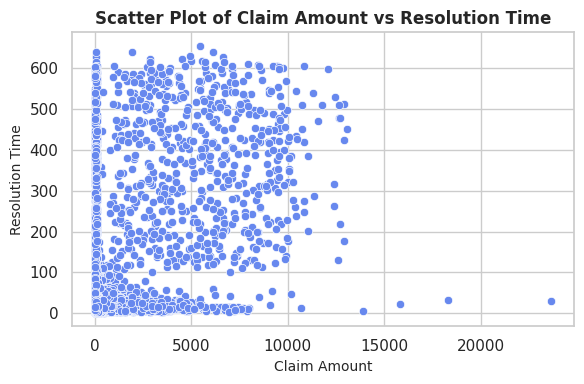

In [130]:
# Peasrosn Correlation
from scipy.stats import pearsonr

x=df1[df1['claim_amount_usd']!=0]['claim_amount_usd']
y=df1['resolution_time_hours']

corr_coeff , p_val = pearsonr(x,y)

print("Pearson Correlation Coefficient:", corr_coeff)
print("P-value:", p_val)

# Spearman Correlation
from scipy.stats import spearmanr

rho, pval_s = spearmanr(x, y)

print("Spearman Correlation Coefficient:", rho)
print("P-value:", pval_s)


# Making a scatter plot to examine the actual relationship between resolution time and claim amount.
plt.figure(figsize=(6,4))
sns.scatterplot(df1,x=x,y=y)
plt.title("Scatter Plot of Claim Amount vs Resolution Time",fontsize=12,weight='bold')
plt.xlabel("Claim Amount",fontsize=10)
plt.ylabel("Resolution Time",fontsize=10)
plt.tight_layout()
plt.show()


The Pearson correlation coefficient (r = 0.5) indicates a strong and statistically significant linear relationship but this is likely skewed by outliers.

However, the Spearman rank correlation (ρ = -0.015) is close to zero, which is more robust to non-linear patterns and outliers — shows no meaningful association between claim amount and resolution time.

Claim amount is not a reliable predictor of resolution time in this dataset.

#### **4. Correlation Between Fraud Probability and Claim Amount**

<Axes: xlabel='claim_amount', ylabel='Count'>

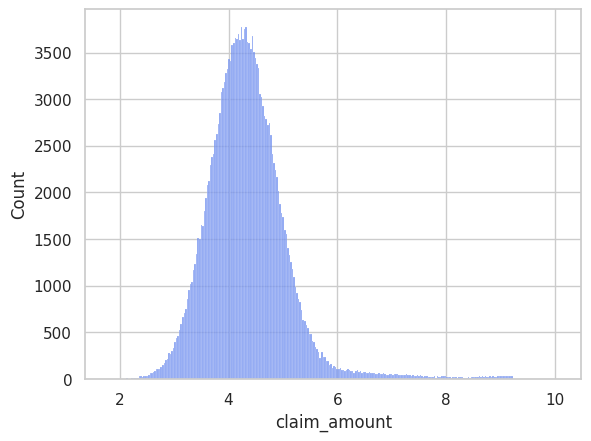

In [131]:
sns.histplot(df1,x=np.log1p(df['claim_amount']))

# Claim amounts is right-skewed , hence applying log transformation

Pearson (log): 0.0008621681900207011 P-val: 0.6998144156574553
Spearman (log): 0.000506111229898287 P-val: 0.8209382166620602


<Axes: xlabel='claim_amount', ylabel='fraud_probability_score'>

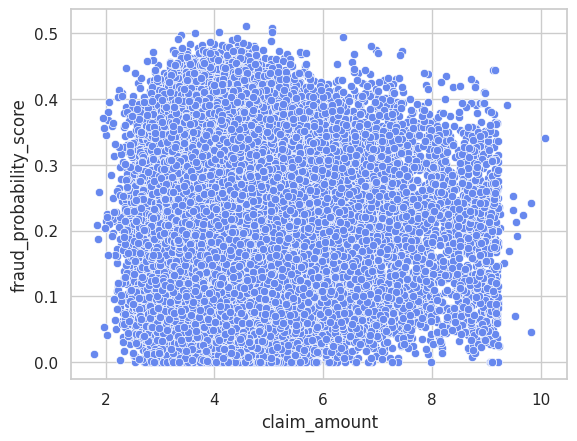

In [132]:
# Pearson correlation (log-transformed)
pearson_corr_log, p_log = pearsonr(np.log1p(df['claim_amount']), df['fraud_probability_score'])

# Spearman correlation (log-transformed)
spearman_corr_log, p_s_log = spearmanr(np.log1p(df['claim_amount']), df['fraud_probability_score'])

print("Pearson (log):", pearson_corr_log, "P-val:", p_log)
print("Spearman (log):", spearman_corr_log, "P-val:", p_s_log)

# a scatter plot to analyze the relationship between fraud_probability_score and claim_amount.
sns.scatterplot(df1,x=np.log1p(df['claim_amount']), y='fraud_probability_score')



Even after accounting for skewed distribution in claim_amount via log transformation, no meaningful correlation was found between claim amount and fraud probability.

the p values and correlations scores show no statistical signiicane and co corelation between the variables

### **4. Payment Method & Operational Attribute Analysis**

This section investigates fraud flag categories, payment methods, and operational parameters like resolution time.

#### **1. Resolution Time Comparison Across Fraud Flags (approved, denied, escalated)?**

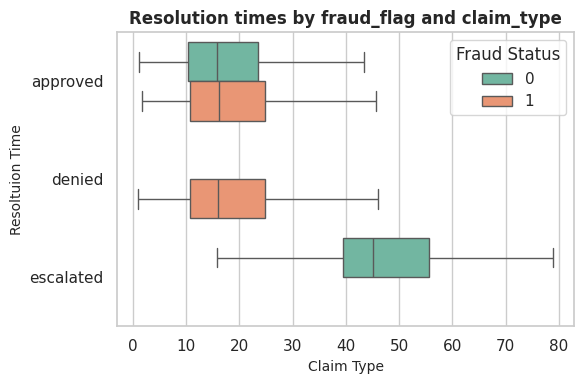

In [133]:
#Grouping by investigation outcome to cgeck the mean and median values of respective resoltion times
df1.groupby('investigation_outcome')['resolution_time_hours'].agg(['mean','median']).round(2)

# Boxplot to compare resolution_time_hours for each fraud flag category.
plt.figure(figsize=(6,4))
sns.boxplot(df1,x='resolution_time_hours',y='investigation_outcome',hue='fraud_flag',palette='Set2',showfliers=False)
plt.title("Resolution times by fraud_flag and claim_type",fontsize=12,weight='bold')
plt.xlabel("Claim Type",fontsize=10)
plt.ylabel("Resoltuion Time",fontsize=10)
plt.legend(loc='upper right',title='Fraud Status')
plt.tight_layout()
plt.savefig('resolution_time_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()




Approved and denied claims are typically resolved in 15–21 days (median ~16), with relatively narrow spreads.

Escalated claims take substantially longer, with a median of 45 days and a mean of 52.76 days, indicating some claims take much longer than typical.

A boxplot (excluding extreme outliers for clarity) shows a clear distinction in resolution time distribution, especially highlighting the skew in escalated cases.

While approved and denied claims follow similar resolution timelines, escalated claims are significantly slower to resolve,due to their complexity.

#### **2. Fraud Likelihood Variation Across Payment Methods and Fraud Flags**

  payment_method  total  fraud_count  fraud_rate
2      gift_card  15821         3793   23.974464
1            cod  23591         5650   23.949811
4        unknown   5081          996   19.602440
5            upi  48743         9200   18.874505
3    net_banking  19470         3665   18.823832
0           card  67617        12664   18.729018
6         wallet  19677         3615   18.371703


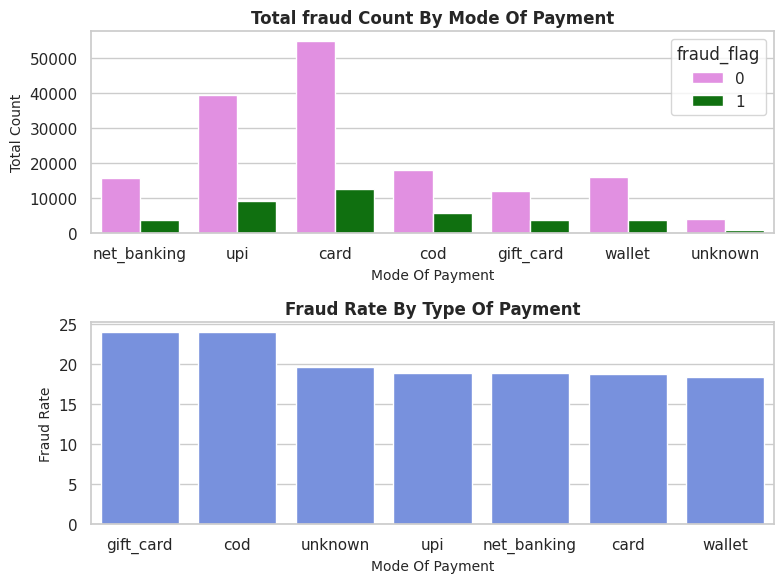

In [134]:
#Grouping the values by payment_method to asses the total count, sum of fraud and fraud rates

fraud_payment_method=df1.groupby('payment_method')['fraud_flag'].agg(['count','sum']).reset_index()

fraud_payment_method=fraud_payment_method.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_payment_method['fraud_rate'] = (fraud_payment_method['fraud_count'] / fraud_payment_method['total'])*100

fraud_payment_method=fraud_payment_method.sort_values(by=['fraud_rate'],ascending=False)
print(fraud_payment_method)

# Plotting the values
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
sns.countplot(df1,x='payment_method',hue='fraud_flag',palette=['Violet',"Green"])
plt.title('Total fraud Count By Mode Of Payment',fontsize=12,weight='bold')
plt.xlabel("Mode Of Payment",fontsize=10)
plt.ylabel("Total Count",fontsize=10)

plt.subplot(2,1,2)
sns.barplot(fraud_payment_method,x='payment_method',y='fraud_rate')
plt.title('Fraud Rate By Type Of Payment',fontsize=12,weight='bold')
plt.xlabel("Mode Of Payment",fontsize=10)
plt.ylabel("Fraud Rate",fontsize=10)

plt.tight_layout()
plt.savefig('fraud_rate_by_payment_method.png', dpi=300, bbox_inches='tight')
plt.show()




In [135]:
"Ho= there is NO assocation betwwen mode of payment and fraud status"

"Ha = payment method affects the fraud status"

from scipy.stats import chi2_contingency

# Contingency table
ct = pd.crosstab(df1['payment_method'], df1['fraud_flag'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Chi-square p-value:", p)
print("Cramér's V:", cramers_v)


Chi-square p-value: 8.100539880783686e-114
Cramér's V: 0.052050039085071644


The analysis reveals that fraud likelihood significantly differs across payment methods:

> gift cards and cash-on-delivery transactions exhibit the highest fraud rates of {24%} while upi , wallet are at {18%}

> A chi-square test confirms this relationship is statistically significant (p < 0.001), indicating that payment method and fraud occurrence are not independent.

> However, the Cramér’s V value (0.052) suggests the strength of the association is weak, meaning that while the variation exists, its practical impact is limited.

> In conclusion, while payment method does influence fraud likelihood, it may not be a dominant predictor on its own — but it could still be valuable when combined with other risk factors in a fraud detection model.

#### **3. Relationship Between Chargebacks and Fraud Occurrence**

In [136]:
df1['chargebacks_count'].value_counts()

,count
chargebacks_count,
0,177213
1,21452
2,1277
3,55
4,3


   chargebacks_count   total  fraud_count  fraud_rate
0                  0  177213        34824   19.650929
1                  1   21452         4509   21.019019
2                  2    1277          237   18.559123
3                  3      55           12   21.818182
4                  4       3            1   33.333333


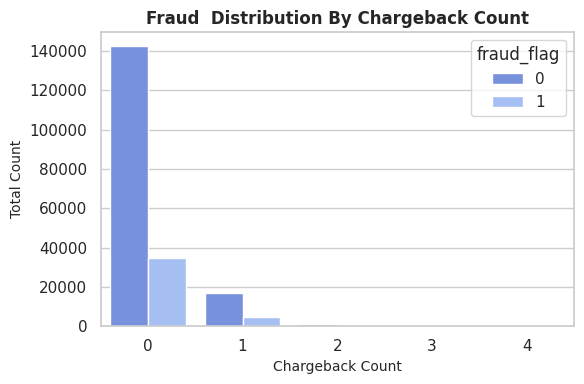

In [137]:
# Grouping the values by device_type to asses the total count, sum of fraud and fraud rates

fraud_by_cb=df1.groupby('chargebacks_count')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_cb=fraud_by_cb.rename(columns={'count': 'total', 'sum': 'fraud_count'})

fraud_by_cb['fraud_rate'] = (fraud_by_cb['fraud_count'] / fraud_by_cb['total'])*100

print(fraud_by_cb)

plt.figure(figsize=(6,4))
sns.countplot(df1,x='chargebacks_count',hue='fraud_flag')
plt.title('Fraud  Distribution By Chargeback Count',fontsize=12,weight='bold')
plt.xlabel("Chargeback Count",fontsize=10)
plt.ylabel("Total Count",fontsize=10)
plt.tight_layout()
plt.show()

After analyzing whether a higher number of chargebacks is associated with a greater likelihood of fraud.

The majority of users (over 90%) had zero or one chargeback. While fraud rates were slightly higher among those with one or more chargebacks, the difference was not consistent or strong. For example, users with 2 chargebacks had a lower fraud rate (18.6%) than those with 1 (21.0%).

Fraud rates beyond 2 chargebacks were based on very small sample sizes, making them statistically unreliable.

Therefore, there is no clear correlation or strong association between chargebacks and fraud in this dataset.

### **5. Dispute, Chargeback & Escalation Insights**
This section evaluates dispute count, chargebacks, which often act as indirect indicators of fraud risk or claim manipulation.

#### **1. Correlation Between Fraud Likelihood and Dispute Count**

In [138]:
df_ct=df1.copy()
# Creating a copy so the bin creatiion columns are not created on the original DF

In [139]:
# Checking values of disputes_count to analyze

df_ct['disputes_count'].value_counts()

,count
disputes_count,
0,158828
1,36731
2,4103
3,327
4,11


In [140]:
# Bining th evalues into 3 categories, so as to reduce noise from highers disputes count and improve
# the intrepratabilty of the values

df_ct['dispute_bins']=df_ct['disputes_count'].apply(lambda x: "No Disputes" if x==0  else("1 Dispute" if x==1 else "2+ Disputes"))


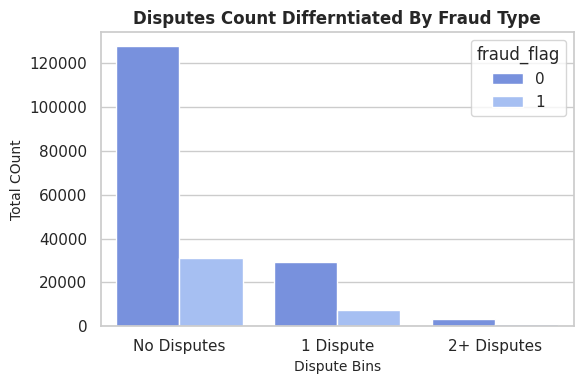

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(df_ct,x='dispute_bins',hue='fraud_flag')
plt.title("Disputes Count Differntiated By Fraud Type",fontsize=12,weight='bold')
plt.xlabel("Dispute Bins",fontsize=10)
plt.ylabel("Total COunt",fontsize=10)
plt.tight_layout()
plt.show()


  dispute_bins   count    sum  fraud_rate
1  2+ Disputes    4441    955   21.504166
0    1 Dispute   36731   7444   20.266260
2  No Disputes  158828  31184   19.633818


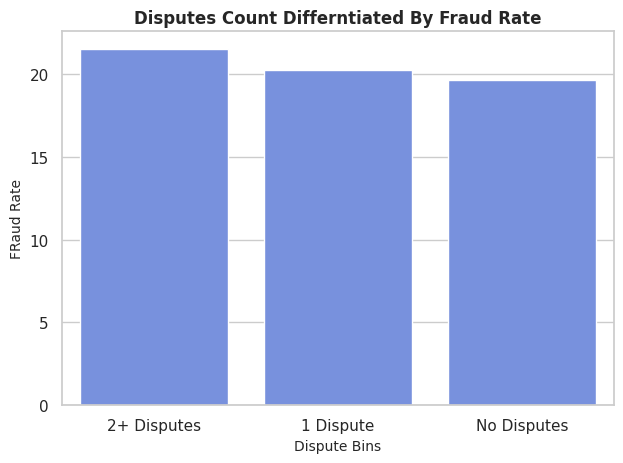

In [142]:
# Grouping the disputes bin and grouping by fruads to asses fraud rate

fraud_by_disputes = df_ct.groupby('dispute_bins')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_disputes['fraud_rate'] = (fraud_by_disputes['sum'] / fraud_by_disputes['count']) * 100

fraud_by_disputes=fraud_by_disputes.sort_values(by='fraud_rate',ascending=False)

print(fraud_by_disputes)

# Plotting the values to  visualize the fraud Rates
sns.barplot(data=fraud_by_disputes, x='dispute_bins', y='fraud_rate')
plt.title("Disputes Count Differntiated By Fraud Rate",fontsize=12,weight='bold')
plt.xlabel("Dispute Bins",fontsize=10)
plt.ylabel("FRaud Rate",fontsize=10)
plt.tight_layout()
plt.show()



In [143]:
# Hypothesis
"Ho= there is NO assocation betwwen dispute attempts and fraud"

"Ha = dispute attempts affects the fraud"

# Chi Square Test
from scipy.stats import chi2_contingency

observed=pd.crosstab(df_ct['dispute_bins'],df_ct['fraud_flag'])

chi_stat , p_val , dof , expected_freq = chi2_contingency(observed)

# Calcualting Cramers V to asses the size of impact
n = observed.sum().sum()  # total number of observations
min_dim = min(observed.shape) - 1  # min(#rows, #cols) - 1
cramers_v = np.sqrt(chi_stat / (n * min_dim))


print("Chi-square statistic:", chi_stat)
print("\n")
print("Cramér's V:", cramers_v)
print("\n")
print("P-value:", p_val)


Chi-square statistic: 15.908921770334087


Cramér's V: 0.008918778439431627


P-value: 0.00035109248289705275


 The **low p-value (< 0.05)** indicates a statistically significant association between dispute count and fraud.

 However, the **Cramér's V of 0.0089** suggests the effect size is extremely small — **not practically significant**.

While from a business perspective, it's worth noting that fraud rate does increase slightly with more disputes

No disputes: 19.63% |
1 dispute: 20.27%   |
2+ disputes: 21.50%

Conclusion:
Although statistically significant, the relationship between dispute history and fraud is **weak in practical terms**. This variable alone is not a strong predictor of fraud but may offer incremental value when combined with other features.



#### **2. Relationship Between Fraud Probability and Chargeback Count**

In [144]:
df_ct['chargebacks_count'].value_counts()

,count
chargebacks_count,
0,177213
1,21452
2,1277
3,55
4,3


In [145]:
# Bining th evalues into 3 categories, so as to reduce noise from highers disputes count and improve
# the intrepratabilty of the values

df_ct['chargebacks_bins']=df_ct['chargebacks_count'].apply(lambda x: "No CB" if x==0  else("1 CB" if x==1 else "2+ CB's"))


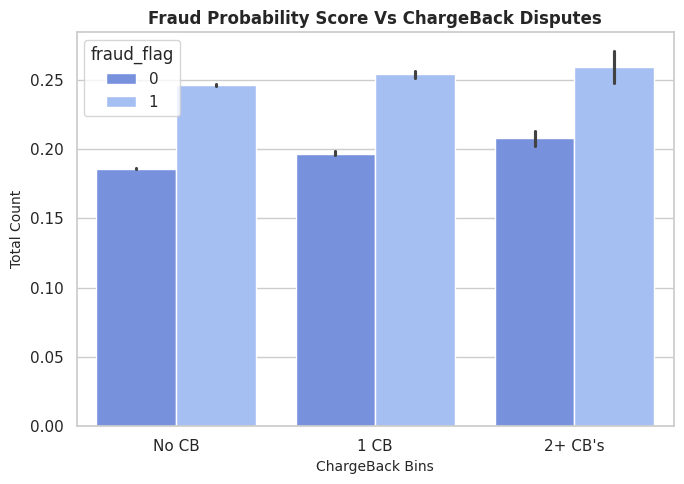

In [146]:
plt.figure(figsize=(7,5))
sns.barplot(df_ct,y='fraud_probability_score',x='chargebacks_bins',hue='fraud_flag',estimator='mean')
plt.title('Fraud Probability Score Vs ChargeBack Disputes',fontsize=12,weight='bold')
plt.xlabel("ChargeBack Bins",fontsize=10)
plt.ylabel("Total Count",fontsize=10)
plt.tight_layout()
plt.show()

In [147]:
df_ct.groupby('chargebacks_bins')['fraud_probability_score'].mean().reset_index(name='mean_fraud_probability_score')

,chargebacks_bins,mean_fraud_probability_score
0,1 CB,0.208756
1,2+ CB's,0.217307
2,No CB,0.197763


While a slight increase in average fraud probability was observed with more chargebacks, the difference is minimal (ranging between 0.1977 to 0.2173).

This suggests that although the relationship might be statistically significant due to sample size, it lacks practical significance in isolation. Thus, chargebacks may not be a strong standalone predictor of fraud risk.


#### **3. Dispute–Chargeback Relationship and Fraud Exposure.**

  dispute_chargeback_combo   count    sum  fraud_rate
3       2+ Disputes | 1 CB     459    102   22.222222
5      2+ Disputes | No CB    3950    847   21.443038
6       No Disputes | 1 CB   17119   3609   21.081839
0         1 Dispute | 1 CB    3874    798   20.598864
2        1 Dispute | No CB   32612   6598   20.231817
1      1 Dispute | 2+ CB's     245     48   19.591837
8      No Disputes | No CB  140651  27379   19.465912
4    2+ Disputes | 2+ CB's      32      6   18.750000
7    No Disputes | 2+ CB's    1058    196   18.525520


/tmp/ipython-input-1963224919.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_by_combo, x='dispute_chargeback_combo', y='fraud_rate', palette='viridis')


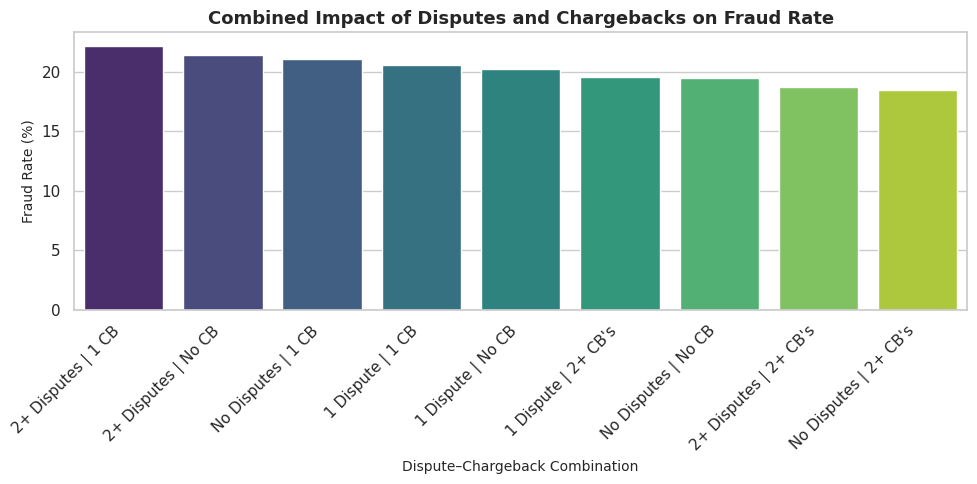

Chi-square p-value: 0.0000
Cramér's V: 0.015


In [148]:
# Taking the dispute and chargeback bins already created from before

# Combine both into a combined bin
df_ct['dispute_chargeback_combo'] = df_ct['dispute_bins'] + " | " + df_ct['chargebacks_bins']

#Grouping by combined bins to calculate fraud rate
fraud_by_combo = df_ct.groupby('dispute_chargeback_combo')['fraud_flag'].agg(['count', 'sum']).reset_index()

fraud_by_combo['fraud_rate'] = (fraud_by_combo['sum'] / fraud_by_combo['count']) * 100

# Sort by fraud rate
fraud_by_combo = fraud_by_combo.sort_values(by='fraud_rate', ascending=False)

print(fraud_by_combo)

# Step 5: Visualize combined impact
plt.figure(figsize=(10,5))
sns.barplot(data=fraud_by_combo, x='dispute_chargeback_combo', y='fraud_rate', palette='viridis')
plt.title("Combined Impact of Disputes and Chargebacks on Fraud Rate", fontsize=13, weight='bold')
plt.xlabel("Dispute–Chargeback Combination", fontsize=10)
plt.ylabel("Fraud Rate (%)", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('combined_dispute_chargeback_fraud.png', dpi=250, bbox_inches='tight')
plt.show()



# Test association between combined bins and fraud
observed = pd.crosstab(df_ct['dispute_chargeback_combo'], df_ct['fraud_flag'])
chi_stat, p_val, dof, expected = chi2_contingency(observed)

# Cramér's V to assess effect size
n = observed.sum().sum()
min_dim = min(observed.shape) - 1
cramers_v = np.sqrt(chi_stat / (n * min_dim))

print(f"Chi-square p-value: {p_val:.4f}")
print(f"Cramér's V: {cramers_v:.3f}")



 Summary:

Fraud rates increase marginally when both disputes and chargebacks are present (max 22.2%) and the Chi-square test confirms a significant association (p < 0.001).  

However, the very low Cramér’s V (0.015) indicates weak practical significance.  

These findings suggest that dispute and chargeback behaviors offer **incremental**, not decisive, predictive value for fraud identification.


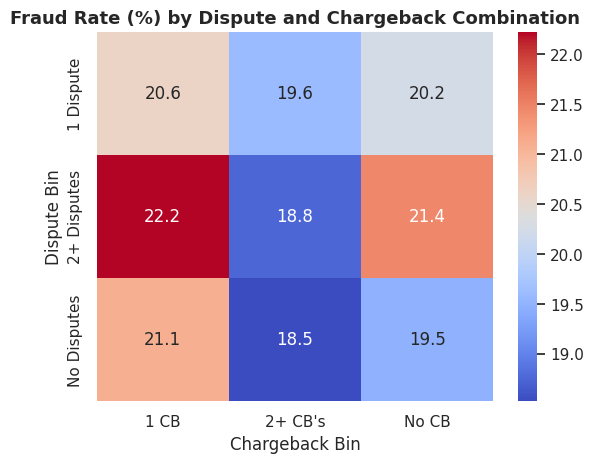

In [149]:
# Heatmap View

pivot_table = pd.crosstab(df_ct['dispute_bins'], df_ct['chargebacks_bins'], values=df_ct['fraud_flag'], aggfunc='mean')
sns.heatmap(pivot_table * 100, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Fraud Rate (%) by Dispute and Chargeback Combination", fontsize=13, weight='bold')
plt.xlabel("Chargeback Bin")
plt.ylabel("Dispute Bin")
plt.show()


## **5. Consolidated Insights & Recommendations**



### **Fraud Rate & Distribution Analysis**

- **Claim type** strongly influences fraud likelihood, with **certain refund programs** showing notably higher rates (~27%), giving the variable moderate predictive value.  
- **Fraud rates** rise slightly on weekends (~17%), indicating potential oversight gaps during off-peak hours.  
- **Regional differences** are statistically insignificant, suggesting geography is not a reliable predictor of fraudulent behavior.  
- **Mobile transactions** show marginally higher fraud rates (~20%), though the effect size remains small.  
- **Subjective claim reasons** such as *“Counterfeit”* or *“Item Not Received”* consistently exhibit above-average fraud probability.  
- Overall, fraud probability remains **geographically neutral**, reinforcing that **behavioral and categorical attributes** are more informative than regional ones.  

**_Recommendations_**  
- Tighten review protocols and verification checks for **high-risk claim categories** and subjective reasons.  
- Implement **weekend-specific monitoring or anomaly detection** to address temporal risk spikes.  
- Use **device type and submission timing** as secondary fraud indicators in feature engineering.  
- De-prioritize regional segmentation in modeling; focus on **claim reason and behavioral variables** instead.  



### **Customer Behavior & Claim Frequency Patterns**

- **Fraud probability** increases slightly with prior claim frequency (0.19 → 0.23), though the effect remains weak (η² ≈ 0.01).  
- **Account age** and **claim recency** show minimal correlation with fraud likelihood, indicating limited standalone predictive value.  
- **Resolution time differences** between fraudulent and legitimate cases are statistically significant but operationally minor.  
- **First-time vs. repeat claimants** show little predictive power (Cramér’s V = 0.018), reinforcing that behavioral trends outweigh single variables.  

**_Recommendations_**  
- Treat **account age** and **claim frequency** as **contextual modifiers**, not primary fraud drivers.  
- Focus on **broad process optimization** rather than SLA adjustments based on fraud status.  
- Monitor **repeat claimants over time** to identify potential abuse evolution and design early-warning triggers.  



### **Transaction & Financial Metrics Analysis**

- Both **Pearson (r = 0.41)** and **Spearman (ρ = 0.52)** correlations show a statistically significant positive relationship between claim amount and refund amount, indicating that larger claims generally result in larger refunds.  
- Average refund values for fraudulent and non-fraudulent claims are nearly identical ( 34.67$ vs 34.76$), with no statistically or practically significant difference (**p = 0.898, Cohen’s d = 0.0007**).  
- Claim amount shows no meaningful association with resolution time — Pearson’s r (0.5) is inflated by outliers, while Spearman’s ρ (–0.015) confirms no monotonic trend.  
- Even after log transformation, claim amount remains uncorrelated with fraud probability; both correlation and p-values indicate no statistical significance.  

**_Recommendations_**  
- While **claim and refund amounts** move together predictably, monetary size alone is **not indicative of fraud risk** — it should serve as a **control feature**, not a primary fraud signal.  
- Since **financial variables** are not meaningfully linked to resolution time or fraud probability, future models should emphasize **behavioral, categorical, and operational indicators** rather than transaction size.  



### **Payment Method & Operational Attribute Analysis**

- **Approved and denied claims** typically resolve within 15–21 days (median ≈ 16), showing tight operational consistency.  
  **Escalated claims**, however, take substantially longer — median 45 days, mean ≈ 53 — reflecting higher complexity and additional review cycles.  
  The clear separation in resolution-time distributions indicates that **escalation status is a key operational driver** of SLA variability.  

- **Fraud occurrence** varies notably by payment method — highest among **gift card** and **cash-on-delivery** transactions (24%), and lower for *UPI* and **wallet** payments (~18%).  
  This suggests differing verification rigor and traceability across payment channels.  

- Over 90% of users record **zero or one chargeback**.  
  Fraud rates rise slightly with chargeback frequency (≈21% for one chargeback), but the trend becomes inconsistent beyond two chargebacks.  
  Given small sample sizes and weak correlations, **chargebacks alone are not reliable fraud indicators** in this dataset.  

**_Recommendations_**  
- Since **escalated claims** significantly prolong resolution times, establish **specialized review queues or process automation** to reduce delays.  
- Leverage **payment-method risk profiling** to strengthen preemptive validation for higher-risk transaction modes (e.g., gift cards, COD).  
- Use **chargeback frequency** as a secondary operational signal within broader fraud-risk scoring models.  


### **Dispute, Chargeback & Escalation Insights**

- **Fraud rate** increases slightly with the number of disputes — from 19.6 % (no disputes) to 21.5 % (2+ disputes).  
  Although the Chi-square test confirms statistical significance (**p < 0.05**), the effect size is negligible (**Cramér’s V = 0.0089**), indicating limited standalone predictive value.  
- **Fraud probability** shows a marginal rise with more chargebacks (0.198 → 0.217), suggesting a weak upward trend.  
  While significance may appear due to large sample size, the effect remains practically small — **chargebacks alone are not strong fraud predictors**.  
- When **disputes and chargebacks** occur together, fraud rates rise modestly (max ≈ 22.2 %).  
  The Chi-square test (**p < 0.001**) confirms association, but the low effect size (**Cramér’s V = 0.015**) implies weak practical influence.  
  These features, when modeled jointly, can offer **incremental improvement** in fraud-risk scoring, though not decisive predictive power.  

**_Recommendations_**  
- Combine **dispute and chargeback counts** into a single behavioral feature to enhance model interpretability and incremental fraud-signal strength.  
- Treat these indicators as **supporting features** within broader behavioral and categorical analysis frameworks.  


## **6. Final Project Summary**




This project replicates the analytical workflow of a fraud and claims investigation specialist — applying data-driven reasoning to detect fraud, validate claims, and quantify operational risk.  
Across multiple analytical dimensions (claim type, customer behavior, payment method, and operational timelines), the findings show that fraud indicators are often subtle and multifactorial rather than driven by a single variable.

While monetary and regional features displayed limited standalone predictive strength, behavioral and categorical factors,such as claim reason, dispute frequency, and payment type — consistently emerged as stronger indicators of elevated risk.

Operationally, escalated cases showed longer resolution times, highlighting the need to balance fraud control measures with SLA efficiency.

Together, these insights illustrate how multiple weak signals can be integrated into composite risk scores, improving claim review prioritization, guiding targeted policy updates, and enhancing fraud-prevention strategy design.

These findings complement the “E-Commerce Returns & Reimbursement Risk Analysis” case study by extending the focus toward behavioral fraud analytics and data-driven risk modeling.
